In [2]:
pip install pandas numpy matplotlib pymannkendall openpyxl


In [1]:
import pandas as pd

# Path to your Excel file
file_path = '/content/Timeseries_jodhpur_Division_rainfall - Copy.xlsx'

# Load the Excel file into a DataFrame
df = pd.read_excel(file_path)

# Display the first 5 rows
print(df.head())


   year  January  February  March  April   May  June   July  August  \
0  1980      0.0       0.0    0.0    0.0   0.0  39.5   81.8     2.0   
1  1981      4.6       0.0    1.8    0.8   3.4  10.5  105.3    58.5   
2  1982      3.5       0.0    1.4   25.2  29.6   6.4  127.5    61.0   
3  1983      0.0       0.0    0.0   19.4   7.7  19.8  619.6   161.3   
4  1984      0.0       0.0    0.0    0.0   0.0  14.4   28.6   140.9   

   September  October  November  December  yearly  Winter  Summer  monsoon  \
0       33.1      0.0       0.0      16.2   172.6     0.0     0.0    156.4   
1       16.7      0.0      65.4       0.0   267.0     4.6     6.0    191.0   
2        4.4      1.0      13.9       0.0   273.9     3.5    56.2    199.3   
3       22.8     35.1       0.0       0.0   885.7     0.0    27.1    823.5   
4       62.8      0.0       0.0       0.0   246.7     0.0     0.0    246.7   

   Postmonsoon  
0         16.2  
1         65.4  
2         14.9  
3         35.1  
4          0.0  


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pymannkendall as mk

# Load the Excel file
file_path = '/content/Timeseries_jodhpur_Division_rainfall - Copy.xlsx'
df = pd.read_excel(file_path)

# Preview your data
print(df.head())

# Assuming structure: 'Year', 'Month', 'District1', 'District2', ..., 'District6'
districts = df.columns[2:]  # Skip 'Year' and 'Month'

# Dictionary to store results
z_values = {}
trend_types = {}

# Apply Mann-Kendall test for each district
for district in districts:
    result = mk.original_test(df[district].dropna())  # Drop NaNs just in case

    # Store results
    z_values[district] = result.z
    trend_types[district] = result.trend

    # Plot rainfall trend
    plt.figure(figsize=(10, 5))
    plt.plot(df['Year'], df[district], marker='o', label=district)
    plt.title(f"{district} - Rainfall Trend\nMann-Kendall Z = {result.z:.2f} | Trend = {result.trend}")
    plt.xlabel('Year')
    plt.ylabel('Rainfall (mm)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 🧾 Summary Table
print("\nMann-Kendall Z-values and Trend Types:")
summary = pd.DataFrame({
    'District': z_values.keys(),
    'Z-value': z_values.values(),
    'Trend': trend_types.values()
})
print(summary)

# 📊 Comparison Bar Chart
plt.figure(figsize=(10, 6))
bars = plt.bar(summary['District'], summary['Z-value'], color='teal')
plt.axhline(0, color='black', linestyle='--')
plt.title('Mann-Kendall Z-values Comparison Across Districts')
plt.xlabel('District')
plt.ylabel('Z-value')
plt.grid(True, axis='y')

# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


   year  January  February  March  April   May  June   July  August  \
0  1980      0.0       0.0    0.0    0.0   0.0  39.5   81.8     2.0   
1  1981      4.6       0.0    1.8    0.8   3.4  10.5  105.3    58.5   
2  1982      3.5       0.0    1.4   25.2  29.6   6.4  127.5    61.0   
3  1983      0.0       0.0    0.0   19.4   7.7  19.8  619.6   161.3   
4  1984      0.0       0.0    0.0    0.0   0.0  14.4   28.6   140.9   

   September  October  November  December  yearly  Winter  Summer  monsoon  \
0       33.1      0.0       0.0      16.2   172.6     0.0     0.0    156.4   
1       16.7      0.0      65.4       0.0   267.0     4.6     6.0    191.0   
2        4.4      1.0      13.9       0.0   273.9     3.5    56.2    199.3   
3       22.8     35.1       0.0       0.0   885.7     0.0    27.1    823.5   
4       62.8      0.0       0.0       0.0   246.7     0.0     0.0    246.7   

   Postmonsoon  
0         16.2  
1         65.4  
2         14.9  
3         35.1  
4          0.0  


KeyError: 'Year'

<Figure size 1000x500 with 0 Axes>

Index(['Year', 'Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug',
       'Sept', 'Oct', 'Nov', 'Dec', 'yearly', 'Winter', 'Summer', 'monsoon',
       'Postmonsoon'],
      dtype='object')


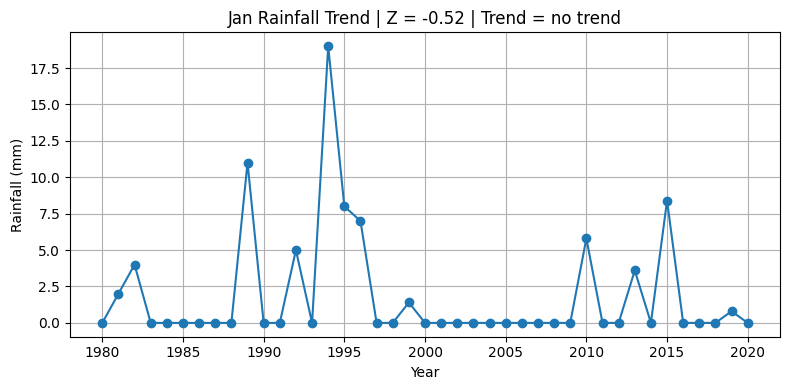

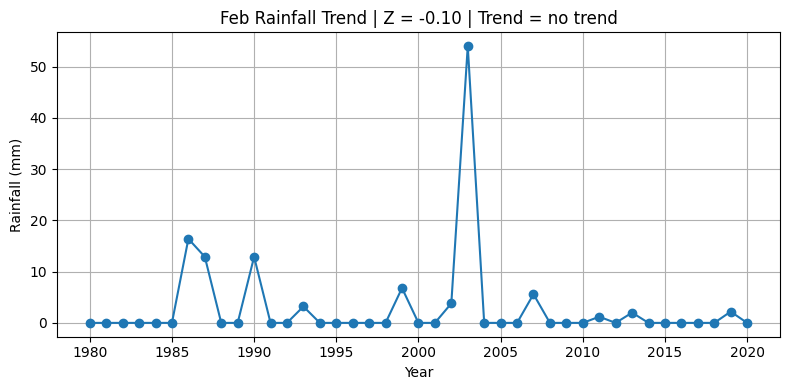

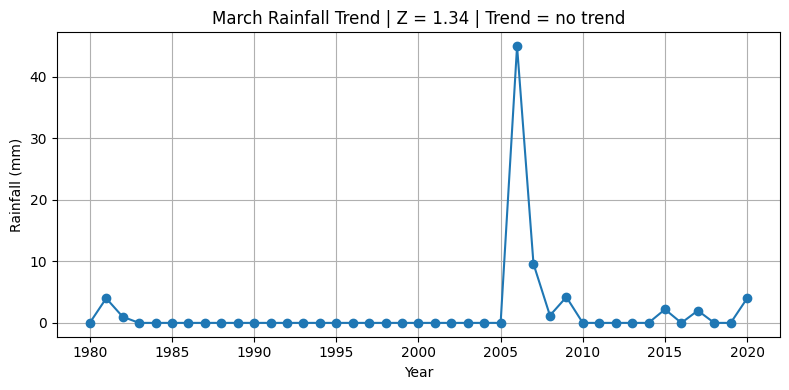

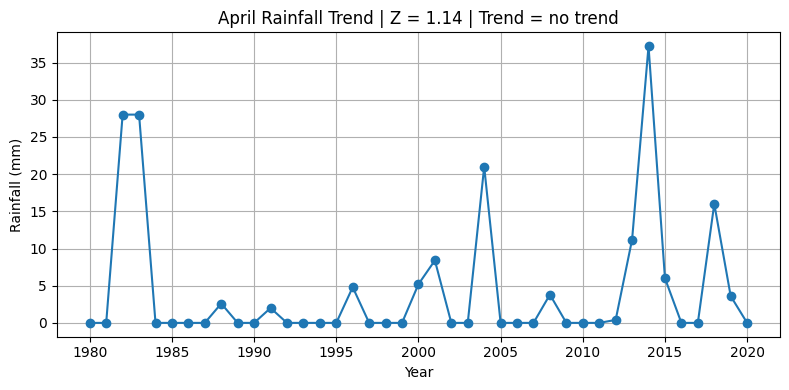

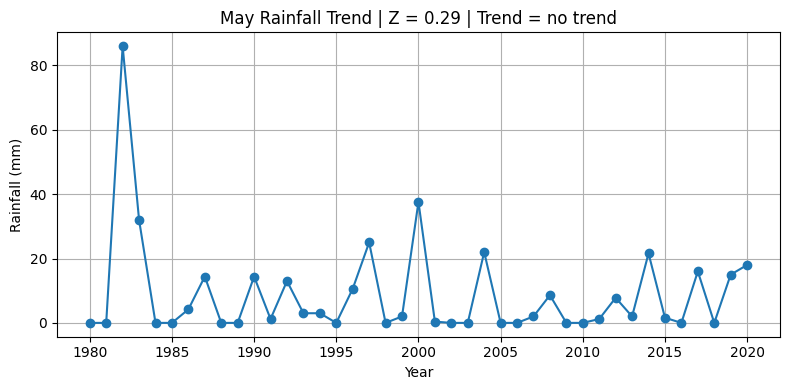

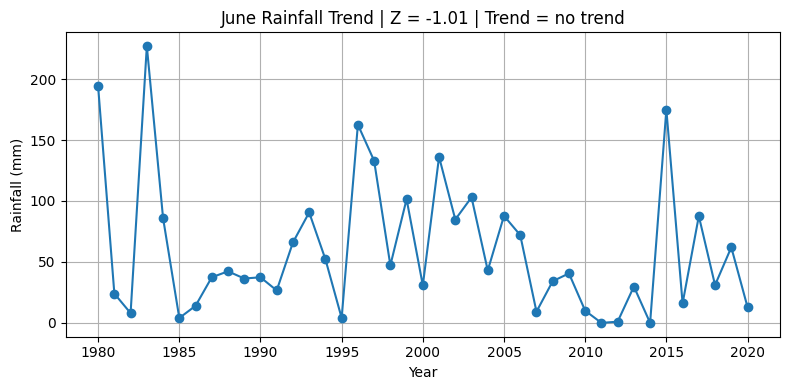

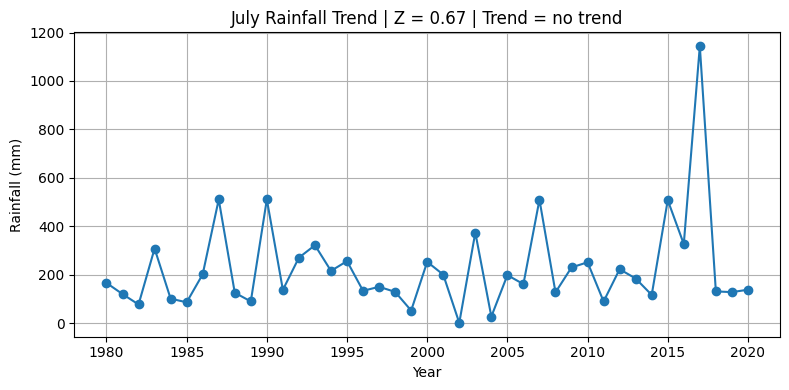

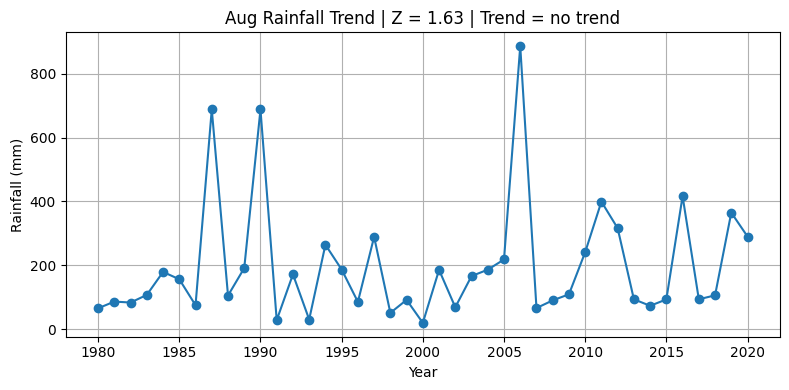

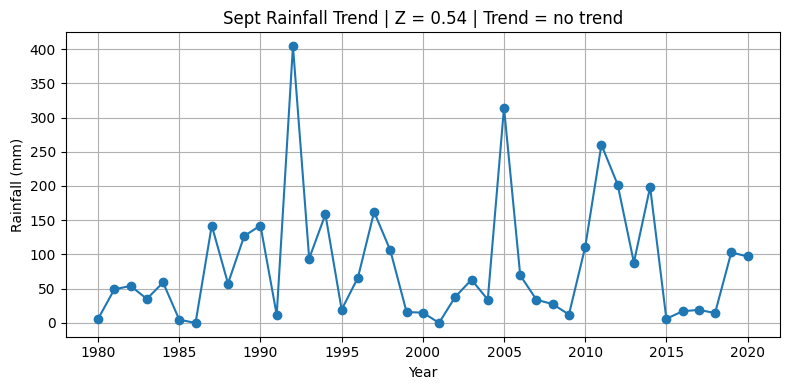

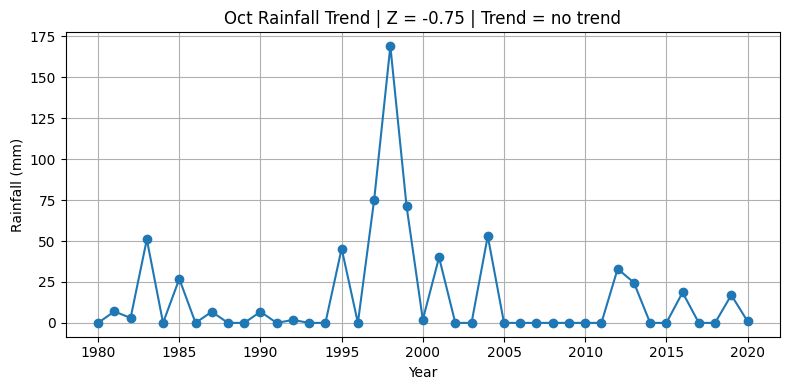

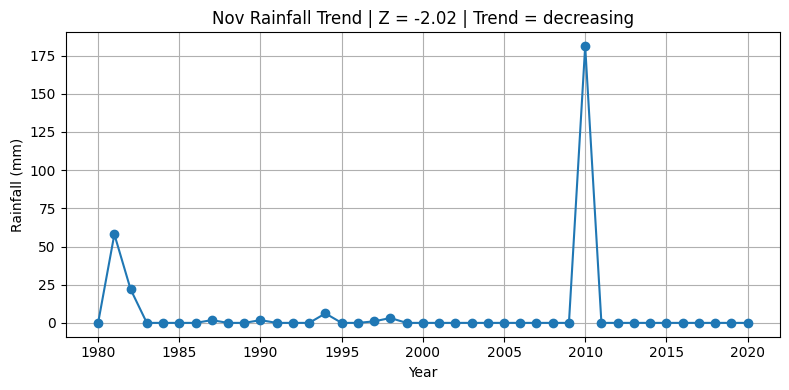

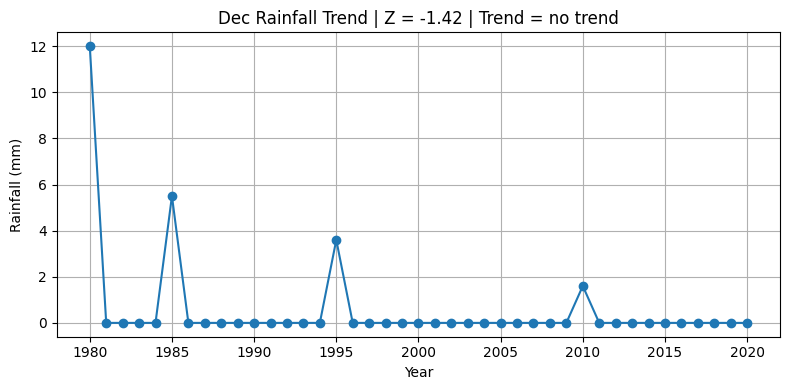

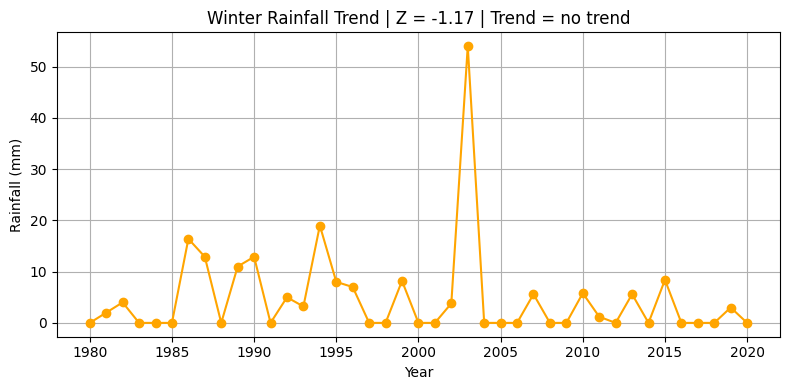

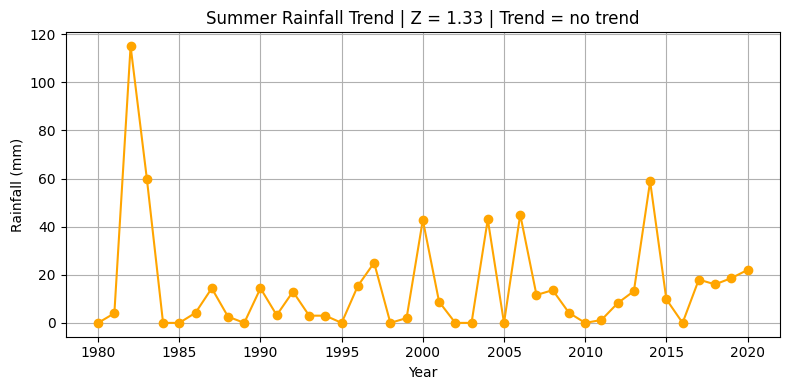

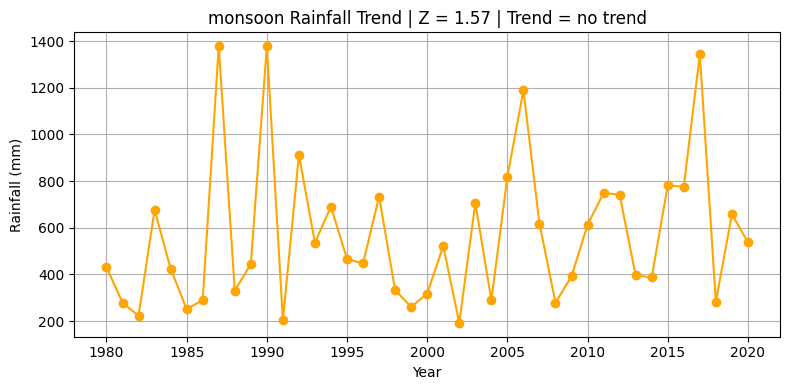

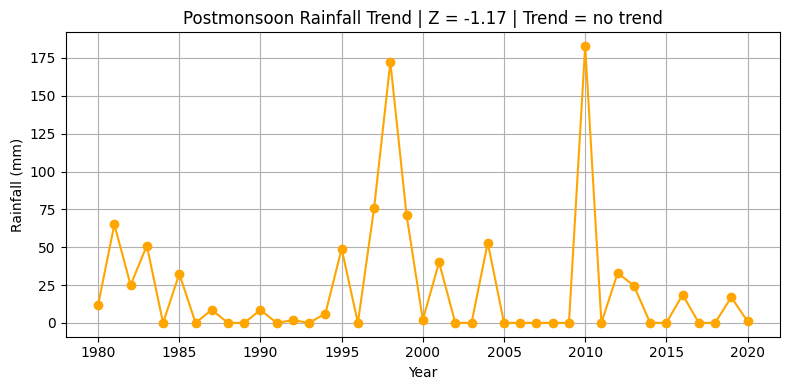

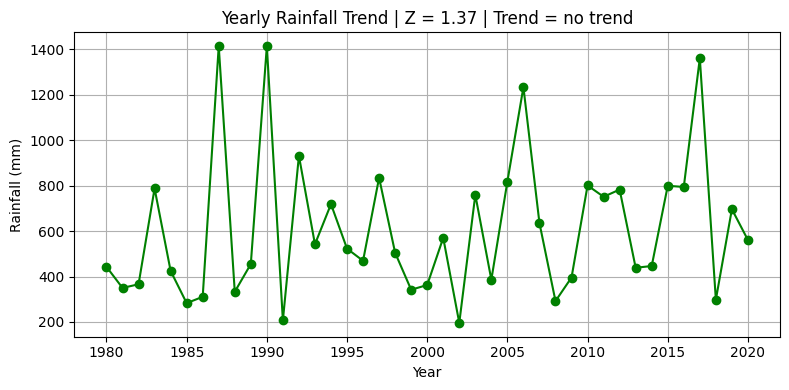


🔎 Mann-Kendall Trend Summary:
       Category   Z-value       Trend
0           Jan -0.518884    no trend
1           Feb -0.101205    no trend
2         March  1.339343    no trend
3         April  1.135792    no trend
4           May  0.290097    no trend
5          June -1.011066    no trend
6          July  0.673959    no trend
7           Aug  1.628837    no trend
8          Sept  0.539235    no trend
9           Oct -0.747020    no trend
10          Nov -2.022127  decreasing
11          Dec -1.424991    no trend
12       Winter -1.173883    no trend
13       Summer  1.328288    no trend
14      monsoon  1.572571    no trend
15  Postmonsoon -1.174197    no trend
16       yearly  1.370383    no trend


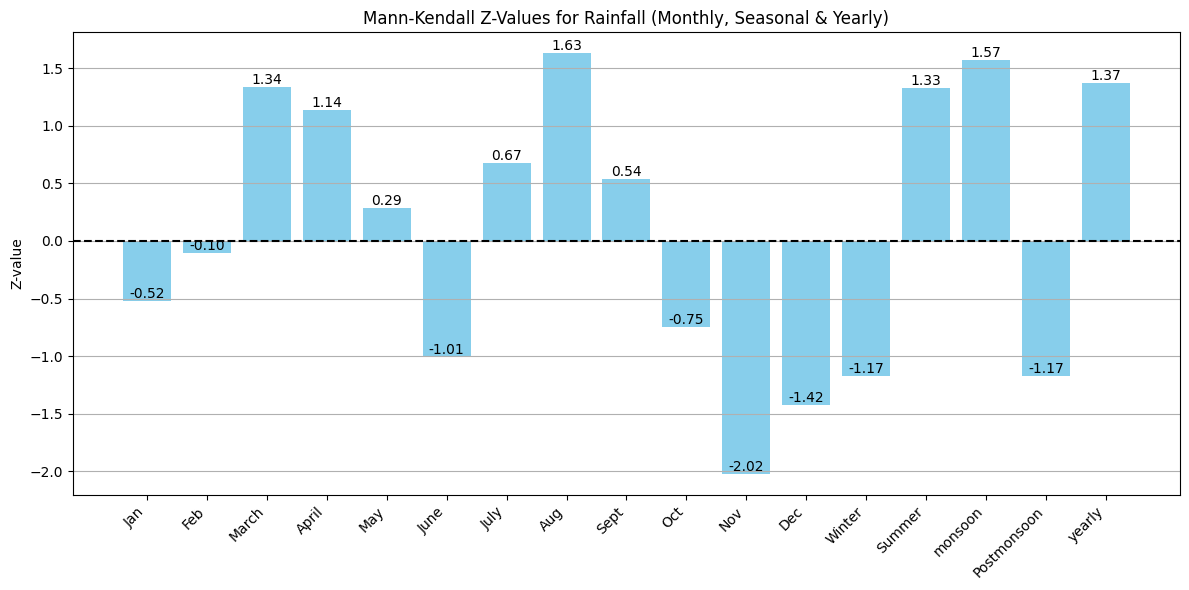

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import pymannkendall as mk

# Load your Excel file
file_path = '/content/Sirohi_Data.xlsx'
df = pd.read_excel(file_path)

# Check your columns
print(df.columns)

# --- Column mapping ---
# Assuming structure: [Year, Jan, Feb, ..., Dec, Yearly, Winter, Summer, Monsoon, PostMonsoon]
months = df.columns[1:13]  # Jan to Dec
year_col = df.columns[0]   # Year
yearly_rain = df.columns[13]
seasons = df.columns[14:18]  # Seasonal columns

# Store Z-values and trends
z_values = {}
trend_types = {}

# --- Monthly Mann-Kendall ---
for col in months:
    result = mk.original_test(df[col].dropna())
    z_values[col] = result.z
    trend_types[col] = result.trend

    # Plot
    plt.figure(figsize=(8, 4))
    plt.plot(df[year_col], df[col], marker='o')
    plt.title(f"{col} Rainfall Trend | Z = {result.z:.2f} | Trend = {result.trend}")
    plt.xlabel("Year")
    plt.ylabel("Rainfall (mm)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Seasonal Mann-Kendall ---
for col in seasons:
    result = mk.original_test(df[col].dropna())
    z_values[col] = result.z
    trend_types[col] = result.trend

    # Plot
    plt.figure(figsize=(8, 4))
    plt.plot(df[year_col], df[col], marker='o', color='orange')
    plt.title(f"{col} Rainfall Trend | Z = {result.z:.2f} | Trend = {result.trend}")
    plt.xlabel("Year")
    plt.ylabel("Rainfall (mm)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Yearly Rainfall Mann-Kendall ---
result = mk.original_test(df[yearly_rain].dropna())
z_values[yearly_rain] = result.z
trend_types[yearly_rain] = result.trend

plt.figure(figsize=(8, 4))
plt.plot(df[year_col], df[yearly_rain], marker='o', color='green')
plt.title(f"Yearly Rainfall Trend | Z = {result.z:.2f} | Trend = {result.trend}")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Summary Table ---
summary = pd.DataFrame({
    'Category': list(z_values.keys()),
    'Z-value': list(z_values.values()),
    'Trend': list(trend_types.values())
})

print("\n🔎 Mann-Kendall Trend Summary:")
print(summary)

# --- Comparison Plot ---
plt.figure(figsize=(12, 6))
bars = plt.bar(summary['Category'], summary['Z-value'], color='skyblue')
plt.axhline(0, color='black', linestyle='--')
plt.title('Mann-Kendall Z-Values for Rainfall (Monthly, Seasonal & Yearly)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Z-value')
plt.grid(True, axis='y')

# Label bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Index(['Year', 'Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug ',
       'Sep ', 'Oct', 'Nov', 'Dec', 'yearly', 'Winter', 'Summer', 'monsoon',
       'Postmonsoon'],
      dtype='object')


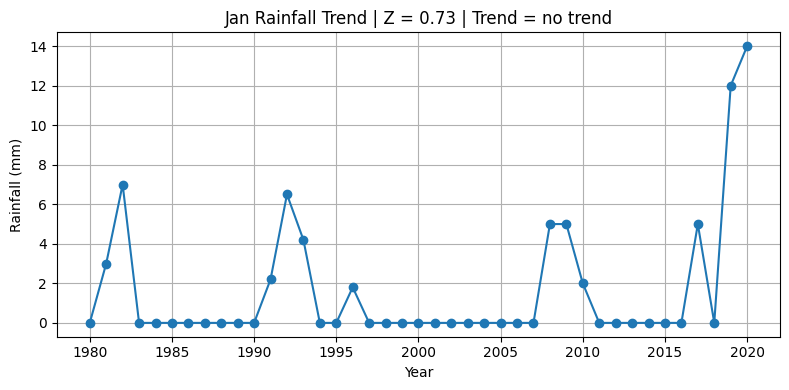

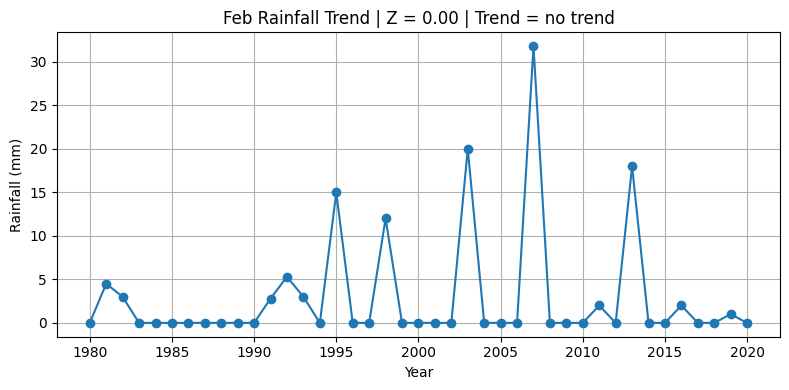

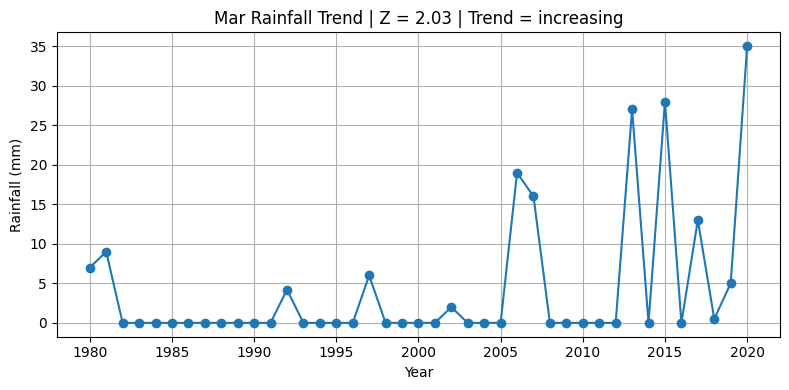

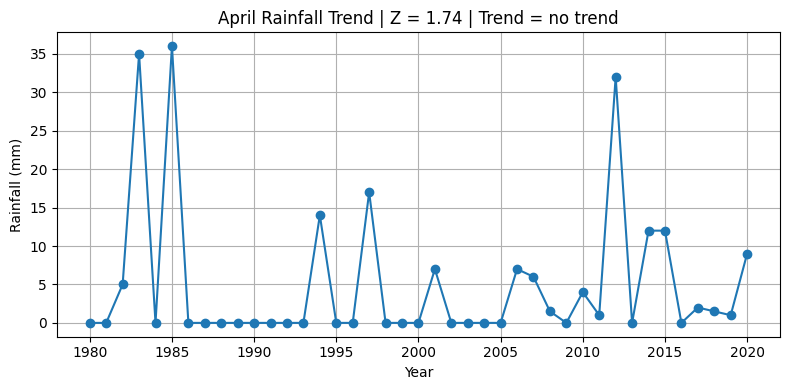

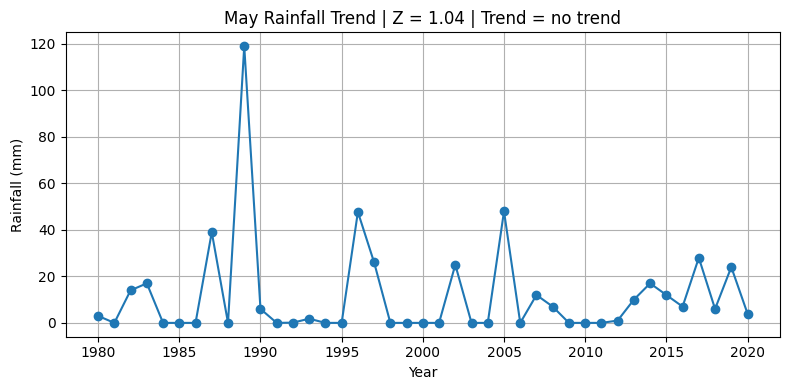

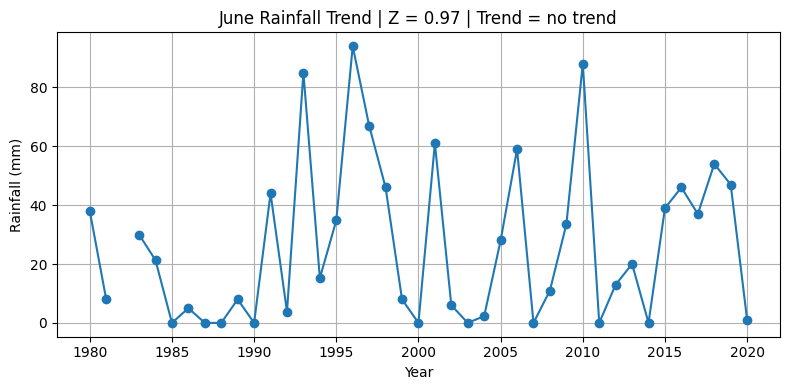

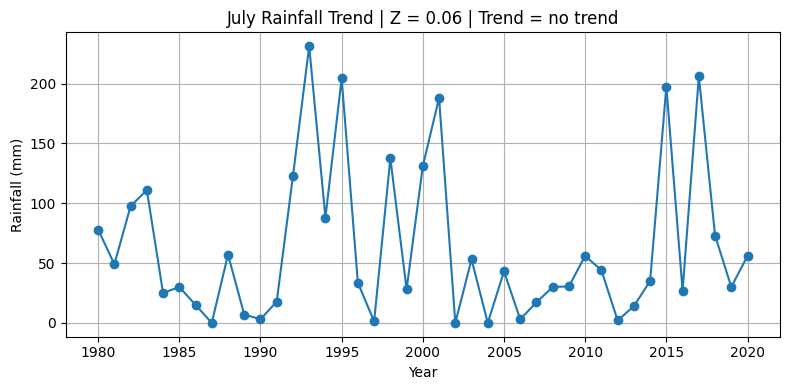

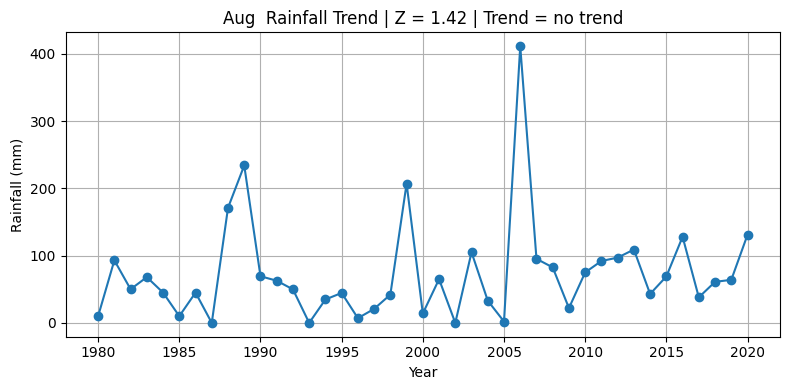

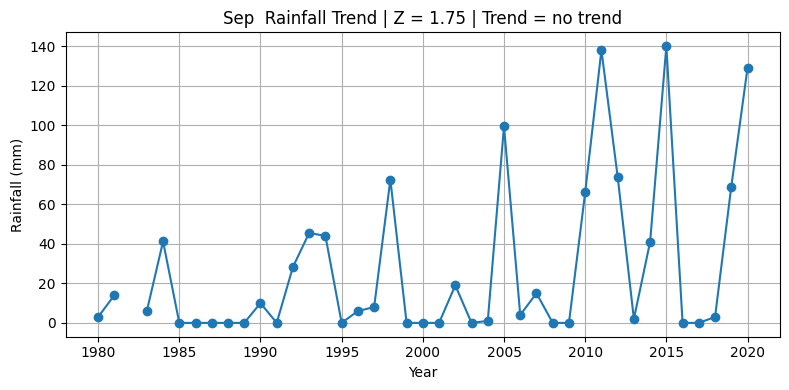

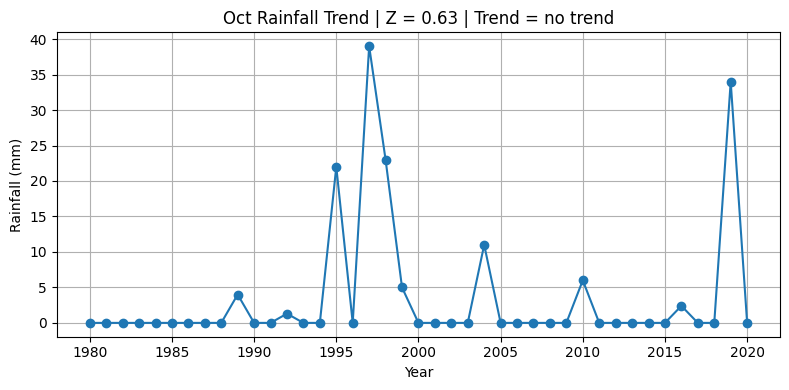

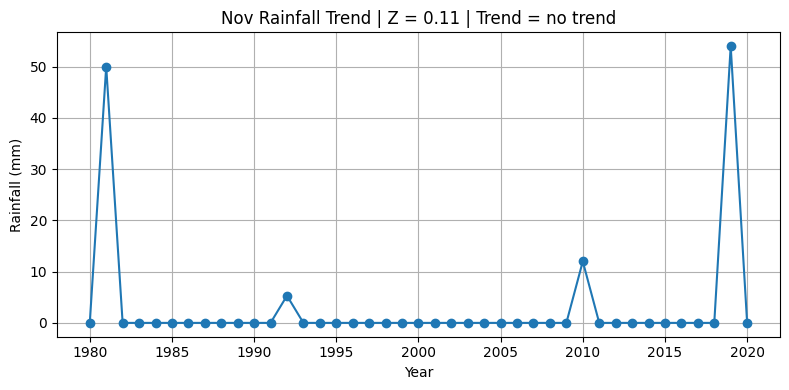

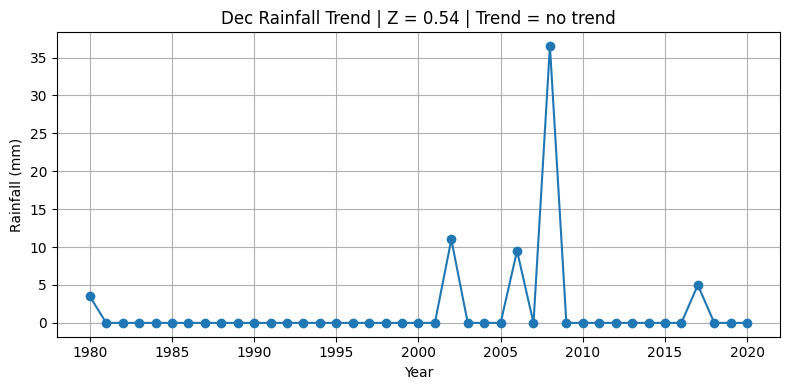

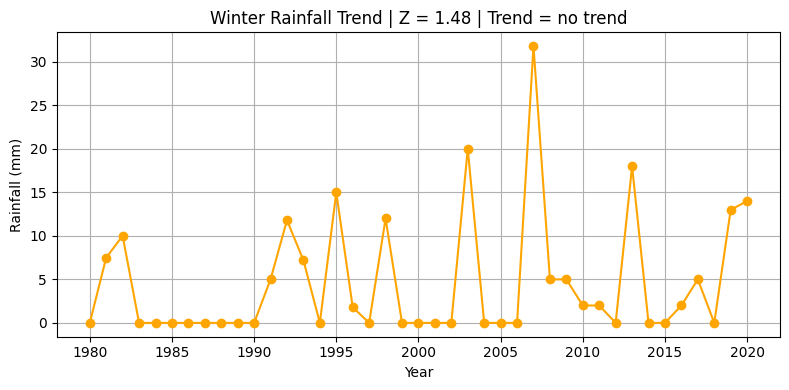

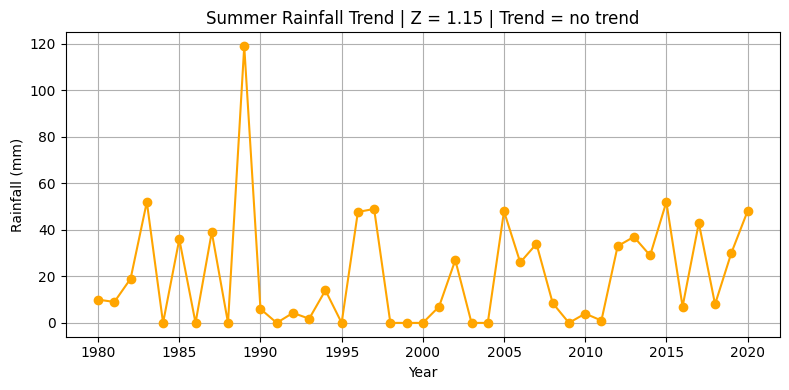

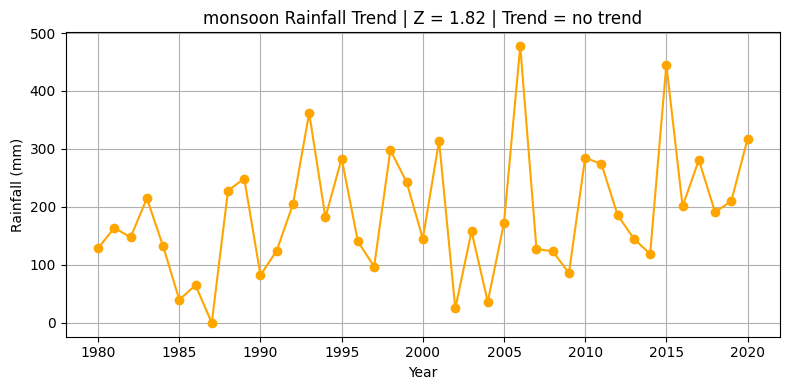

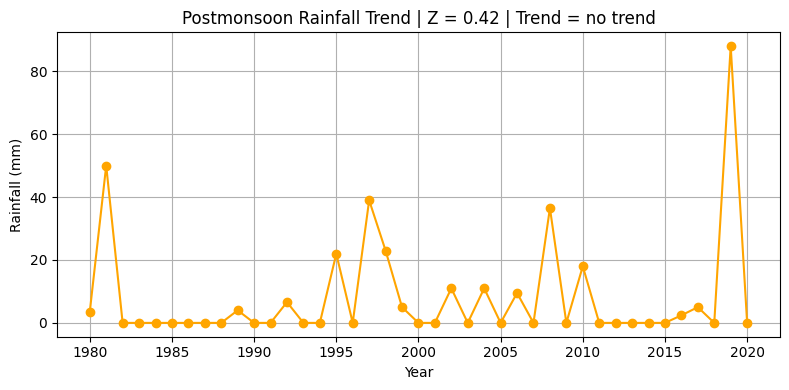

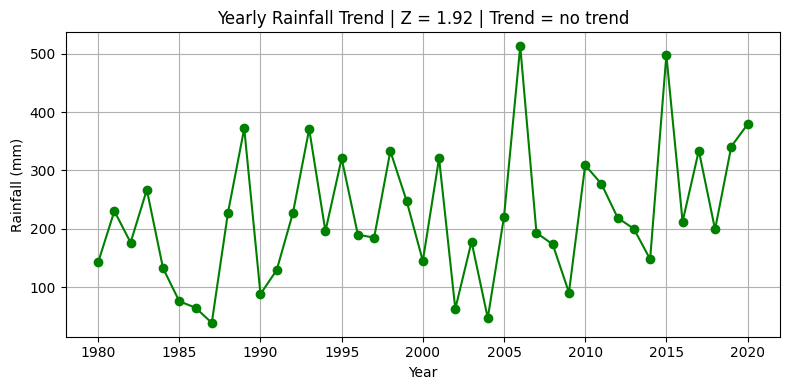


🔎 Mann-Kendall Trend Summary for Jaisalmer:
       Category   Z-value       Trend
0           Jan  0.729506    no trend
1           Feb  0.000000    no trend
2           Mar  2.034300  increasing
3         April  1.737957    no trend
4           May  1.035246    no trend
5          June  0.973444    no trend
6          July  0.056193    no trend
7          Aug   1.415730    no trend
8          Sep   1.750502    no trend
9           Oct  0.628548    no trend
10          Nov  0.109615    no trend
11          Dec  0.536083    no trend
12       Winter  1.483054    no trend
13       Summer  1.146642    no trend
14      monsoon  1.819689    no trend
15  Postmonsoon  0.422822    no trend
16       yearly  1.920661    no trend


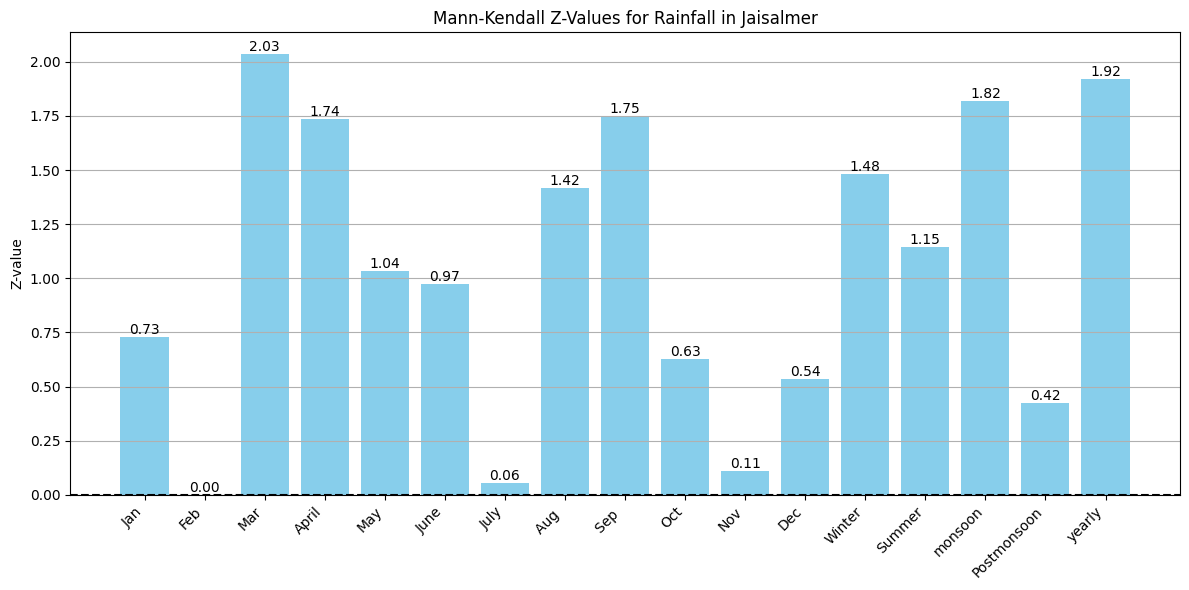

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import pymannkendall as mk

# Load the Jaisalmer rainfall Excel file
file_path = '/content/jaiselmer_Data.xlsx'
df = pd.read_excel(file_path)

# Print column names to verify structure
print(df.columns)

# --- Define columns ---
months = df.columns[1:13]  # Jan to Dec
year_col = df.columns[0]   # Year
yearly_rain = df.columns[13]  # Yearly Total Rainfall
seasons = df.columns[14:18]   # Winter, Summer, Monsoon, PostMonsoon

# Store Z-values and trend types
z_values = {}
trend_types = {}

# --- Monthly Mann-Kendall Analysis ---
for col in months:
    result = mk.original_test(df[col].dropna())
    z_values[col] = result.z
    trend_types[col] = result.trend

    # Plotting
    plt.figure(figsize=(8, 4))
    plt.plot(df[year_col], df[col], marker='o')
    plt.title(f"{col} Rainfall Trend | Z = {result.z:.2f} | Trend = {result.trend}")
    plt.xlabel("Year")
    plt.ylabel("Rainfall (mm)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Seasonal Mann-Kendall Analysis ---
for col in seasons:
    result = mk.original_test(df[col].dropna())
    z_values[col] = result.z
    trend_types[col] = result.trend

    plt.figure(figsize=(8, 4))
    plt.plot(df[year_col], df[col], marker='o', color='orange')
    plt.title(f"{col} Rainfall Trend | Z = {result.z:.2f} | Trend = {result.trend}")
    plt.xlabel("Year")
    plt.ylabel("Rainfall (mm)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Yearly Rainfall Mann-Kendall Analysis ---
result = mk.original_test(df[yearly_rain].dropna())
z_values[yearly_rain] = result.z
trend_types[yearly_rain] = result.trend

plt.figure(figsize=(8, 4))
plt.plot(df[year_col], df[yearly_rain], marker='o', color='green')
plt.title(f"Yearly Rainfall Trend | Z = {result.z:.2f} | Trend = {result.trend}")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Summary Table ---
summary = pd.DataFrame({
    'Category': list(z_values.keys()),
    'Z-value': list(z_values.values()),
    'Trend': list(trend_types.values())
})

print("\n🔎 Mann-Kendall Trend Summary for Jaisalmer:")
print(summary)

# --- Comparison Bar Chart ---
plt.figure(figsize=(12, 6))
bars = plt.bar(summary['Category'], summary['Z-value'], color='skyblue')
plt.axhline(0, color='black', linestyle='--')
plt.title('Mann-Kendall Z-Values for Rainfall in Jaisalmer')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Z-value')
plt.grid(True, axis='y')

# Add value labels to bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Index(['Year', 'Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug',
       'Sept', 'Oct', 'Nov', 'Dec', 'yearly', 'Winter', 'Summer', 'monsoon',
       'Postmonsoon'],
      dtype='object')


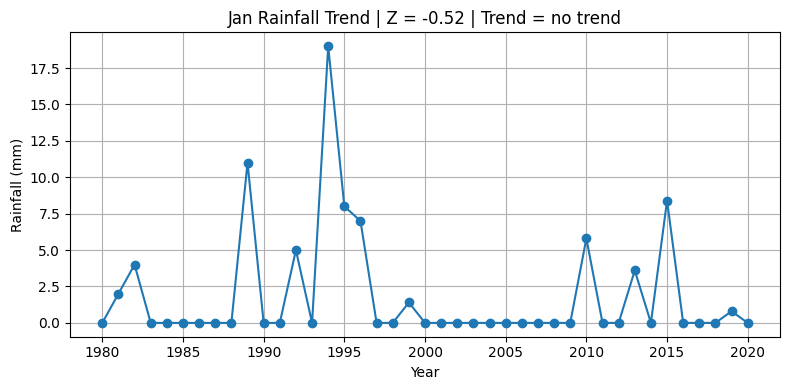

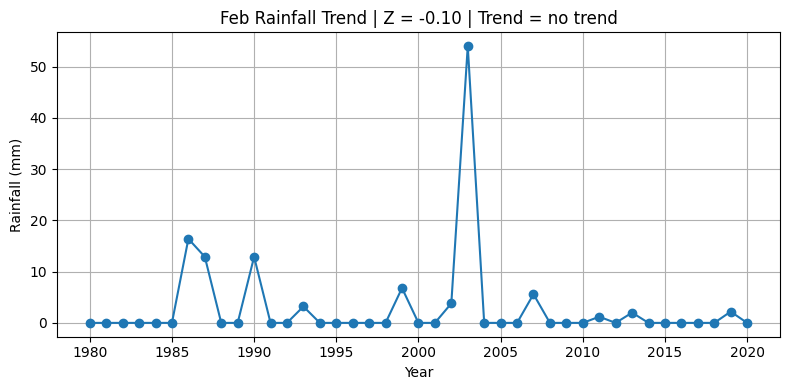

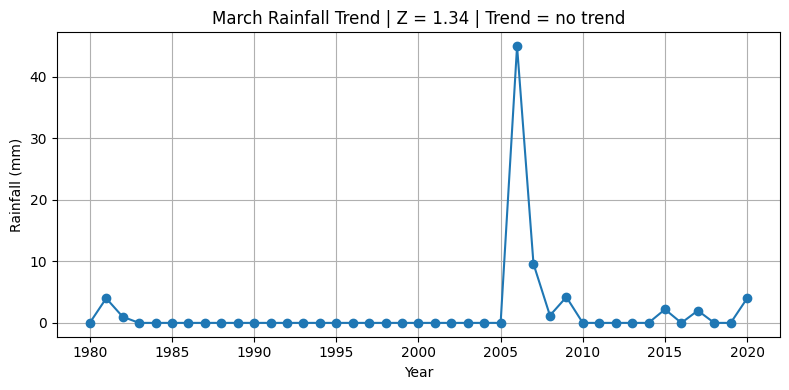

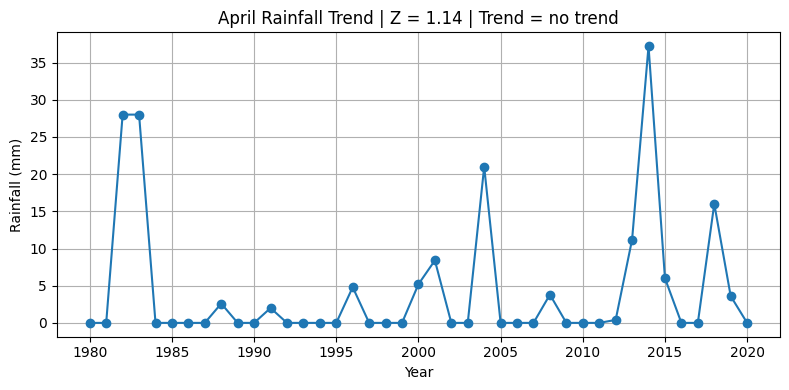

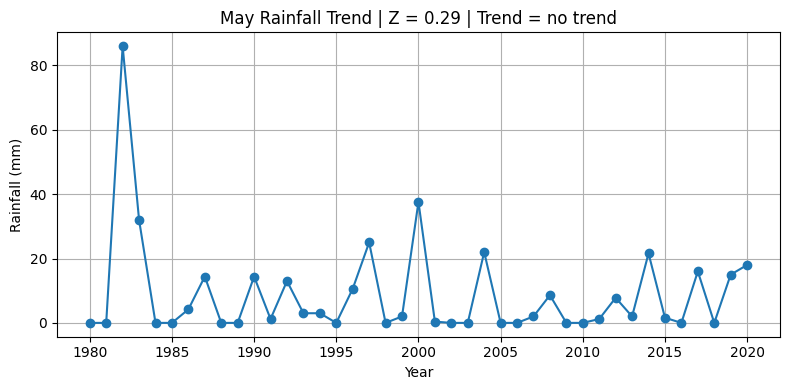

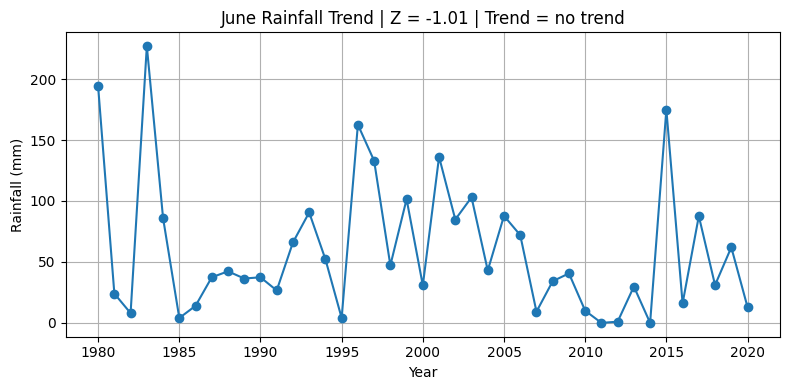

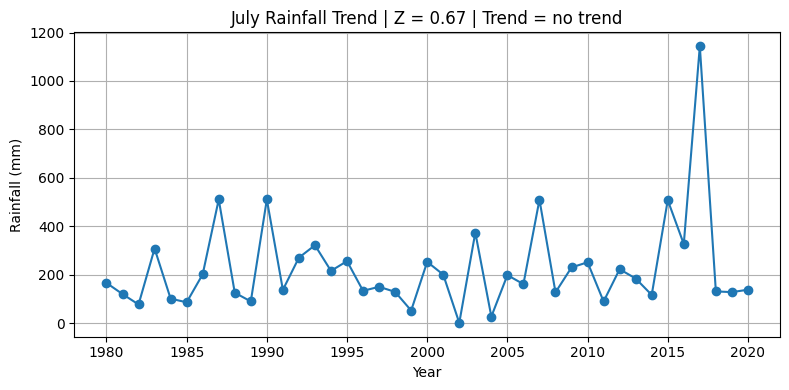

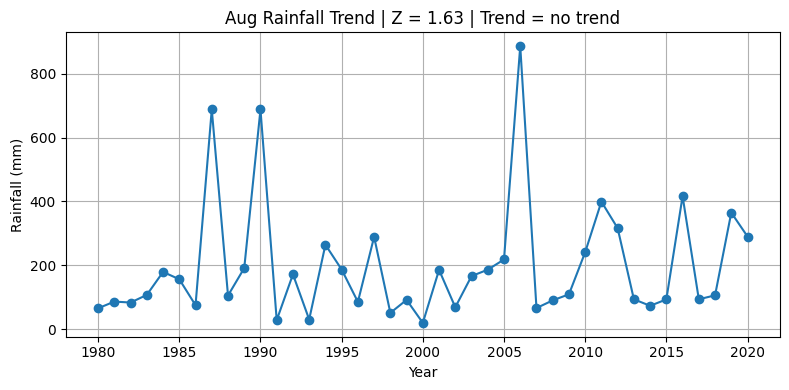

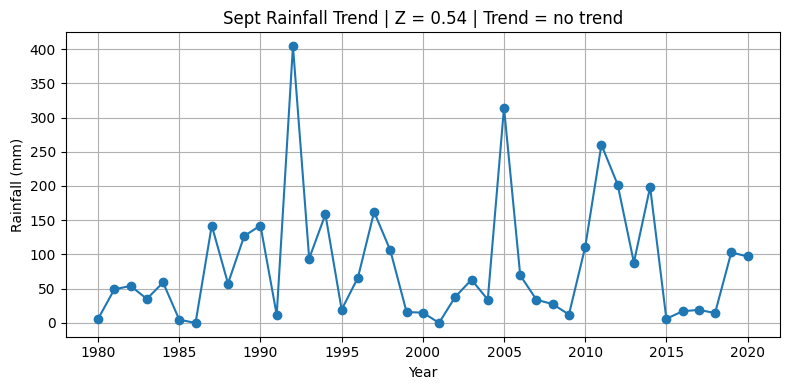

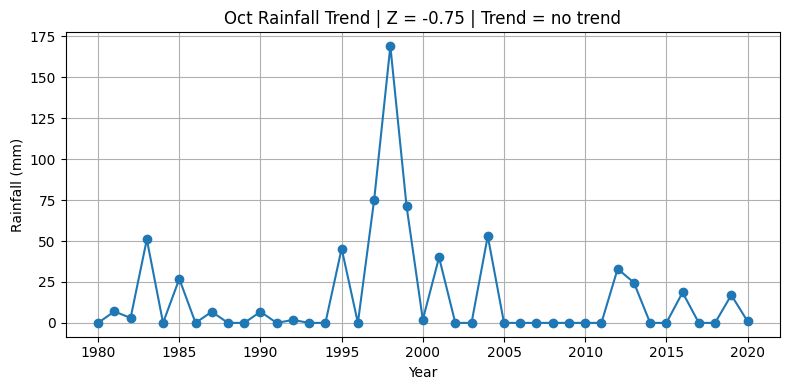

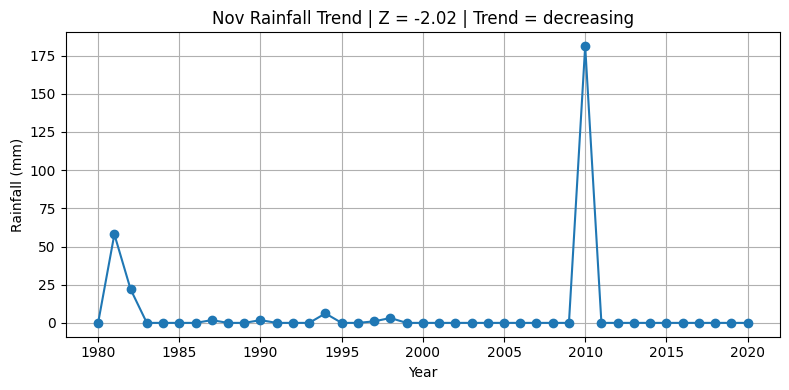

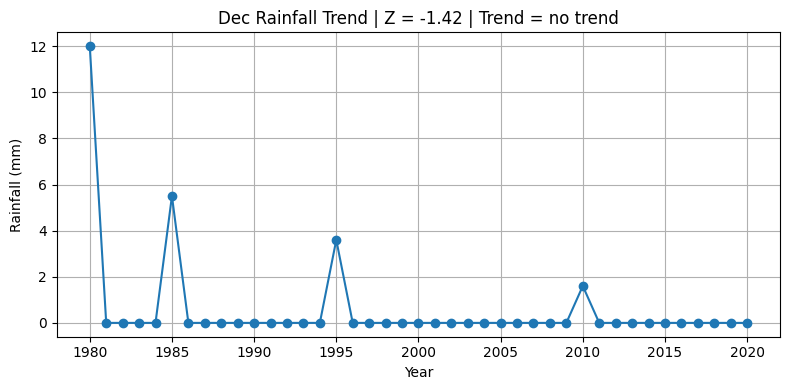

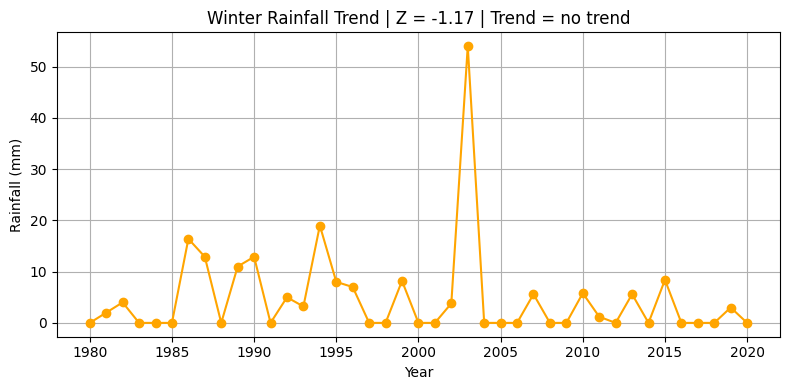

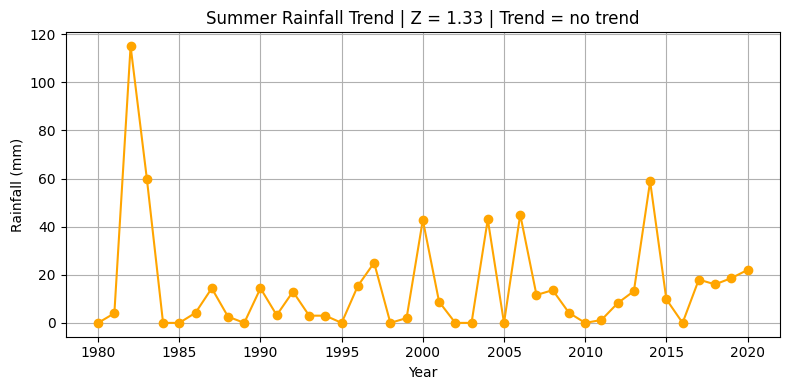

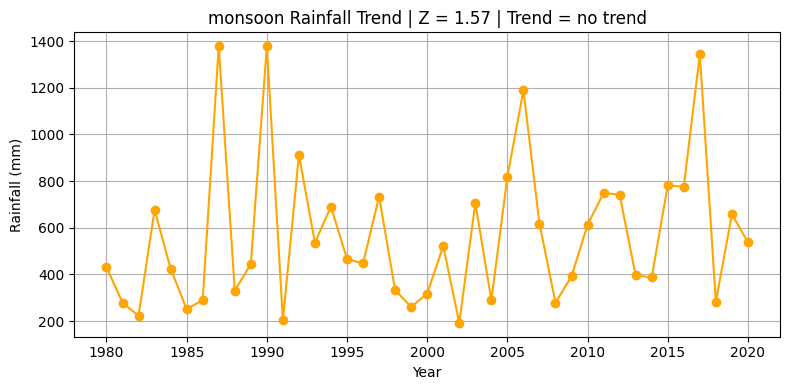

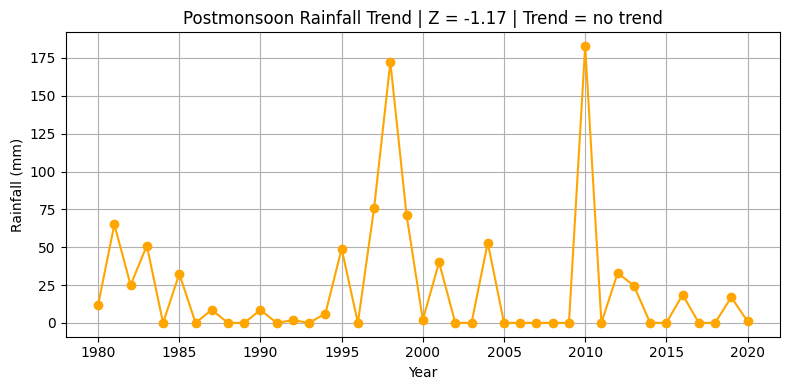

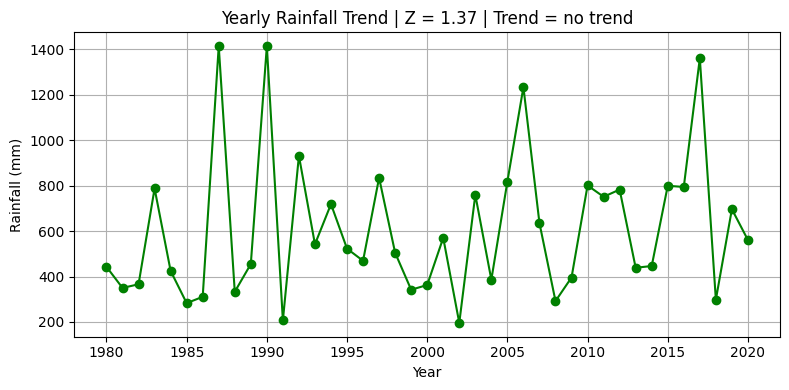


🔎 Mann-Kendall Trend Summary for Sirohi:
       Category   Z-value       Trend
0           Jan -0.518884    no trend
1           Feb -0.101205    no trend
2         March  1.339343    no trend
3         April  1.135792    no trend
4           May  0.290097    no trend
5          June -1.011066    no trend
6          July  0.673959    no trend
7           Aug  1.628837    no trend
8          Sept  0.539235    no trend
9           Oct -0.747020    no trend
10          Nov -2.022127  decreasing
11          Dec -1.424991    no trend
12       Winter -1.173883    no trend
13       Summer  1.328288    no trend
14      monsoon  1.572571    no trend
15  Postmonsoon -1.174197    no trend
16       yearly  1.370383    no trend


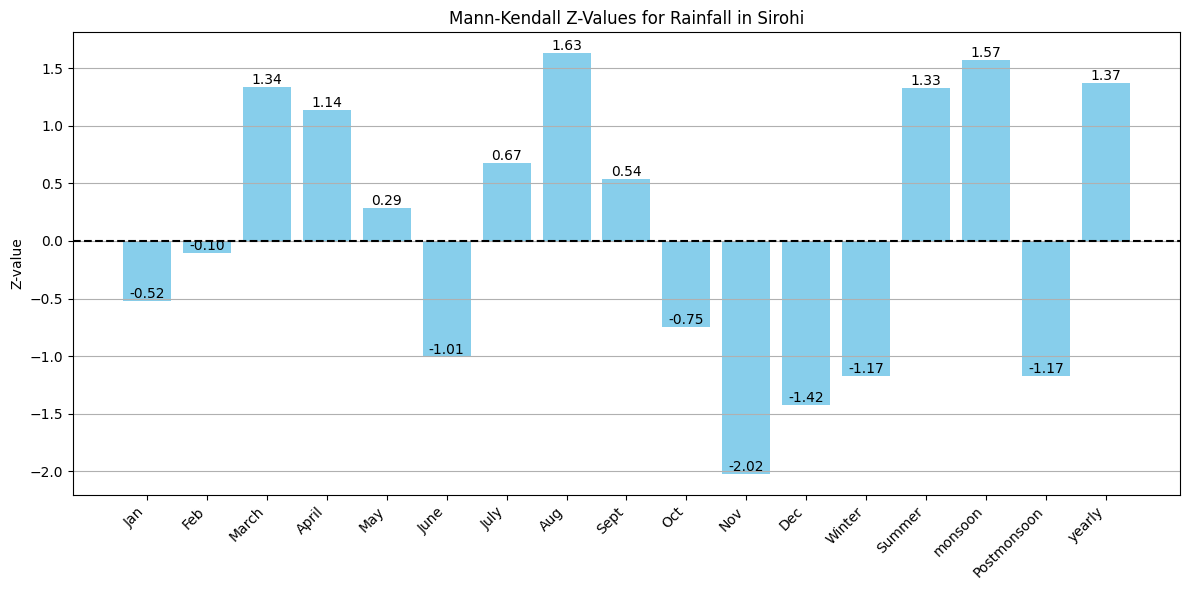

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import pymannkendall as mk

# Load the Sirohi rainfall Excel file
file_path = '/content/Sirohi_Data.xlsx'
df = pd.read_excel(file_path)

# Print column names to verify structure
print(df.columns)

# --- Define columns ---
months = df.columns[1:13]      # Jan to Dec
year_col = df.columns[0]       # Year
yearly_rain = df.columns[13]   # Yearly Total Rainfall
seasons = df.columns[14:18]    # Winter, Summer, Monsoon, PostMonsoon

# Store Z-values and trend types
z_values = {}
trend_types = {}

# --- Monthly Mann-Kendall Analysis ---
for col in months:
    result = mk.original_test(df[col].dropna())
    z_values[col] = result.z
    trend_types[col] = result.trend

    # Plotting
    plt.figure(figsize=(8, 4))
    plt.plot(df[year_col], df[col], marker='o')
    plt.title(f"{col} Rainfall Trend | Z = {result.z:.2f} | Trend = {result.trend}")
    plt.xlabel("Year")
    plt.ylabel("Rainfall (mm)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Seasonal Mann-Kendall Analysis ---
for col in seasons:
    result = mk.original_test(df[col].dropna())
    z_values[col] = result.z
    trend_types[col] = result.trend

    plt.figure(figsize=(8, 4))
    plt.plot(df[year_col], df[col], marker='o', color='orange')
    plt.title(f"{col} Rainfall Trend | Z = {result.z:.2f} | Trend = {result.trend}")
    plt.xlabel("Year")
    plt.ylabel("Rainfall (mm)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Yearly Rainfall Mann-Kendall Analysis ---
result = mk.original_test(df[yearly_rain].dropna())
z_values[yearly_rain] = result.z
trend_types[yearly_rain] = result.trend

plt.figure(figsize=(8, 4))
plt.plot(df[year_col], df[yearly_rain], marker='o', color='green')
plt.title(f"Yearly Rainfall Trend | Z = {result.z:.2f} | Trend = {result.trend}")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Summary Table ---
summary = pd.DataFrame({
    'Category': list(z_values.keys()),
    'Z-value': list(z_values.values()),
    'Trend': list(trend_types.values())
})

print("\n🔎 Mann-Kendall Trend Summary for Sirohi:")
print(summary)

# --- Comparison Bar Chart ---
plt.figure(figsize=(12, 6))
bars = plt.bar(summary['Category'], summary['Z-value'], color='skyblue')
plt.axhline(0, color='black', linestyle='--')
plt.title('Mann-Kendall Z-Values for Rainfall in Sirohi')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Z-value')
plt.grid(True, axis='y')

# Add value labels to bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Index(['Year', 'Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug',
       'Sept', 'Oct', 'Nov', 'Dec', 'yearly', 'Winter', 'Summer', 'monsoon',
       'Postmonsoon'],
      dtype='object')


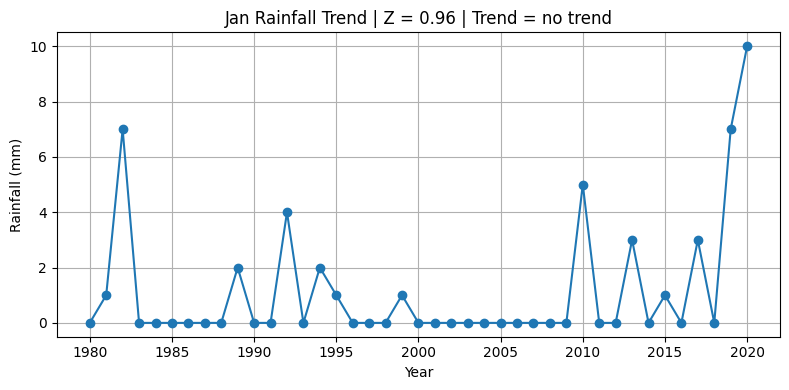

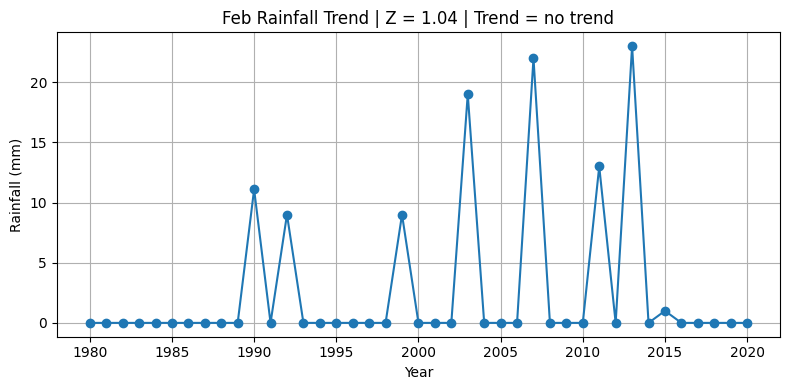

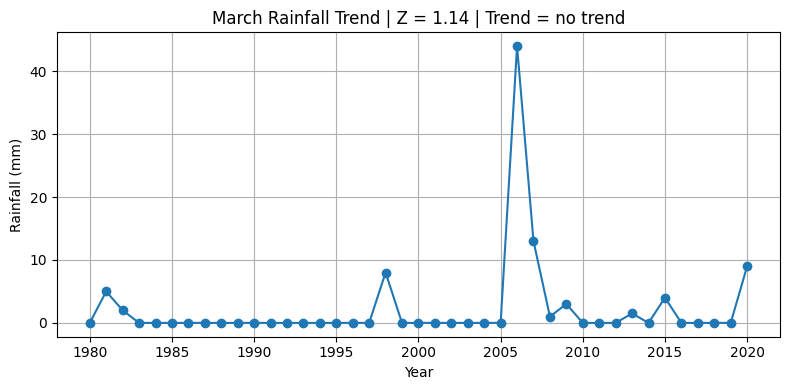

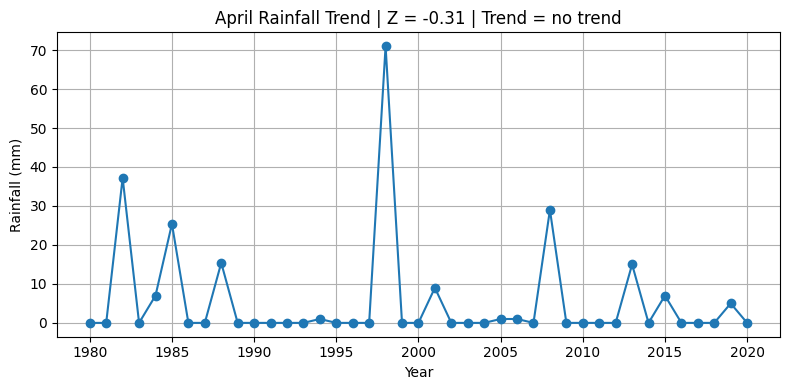

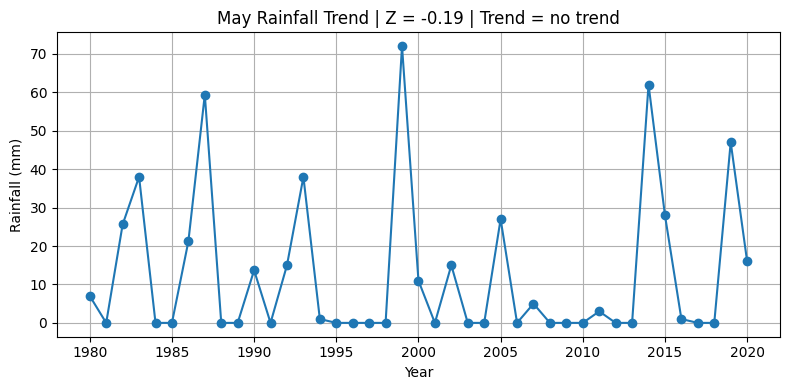

ValueError: could not convert string to float: '—'

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import pymannkendall as mk

# Load the Barmer rainfall Excel file
file_path = '/content/BarmerData.xlsx'
df = pd.read_excel(file_path)

# Print column names to confirm structure
print(df.columns)

# --- Define columns ---
months = df.columns[1:13]      # Jan to Dec
year_col = df.columns[0]       # Year
yearly_rain = df.columns[13]   # Yearly Total Rainfall
seasons = df.columns[14:18]    # Winter, Summer, Monsoon, PostMonsoon

# Store Z-values and trend types
z_values = {}
trend_types = {}

# --- Monthly Mann-Kendall Analysis ---
for col in months:
    result = mk.original_test(df[col].dropna())
    z_values[col] = result.z
    trend_types[col] = result.trend

    # Plotting
    plt.figure(figsize=(8, 4))
    plt.plot(df[year_col], df[col], marker='o')
    plt.title(f"{col} Rainfall Trend | Z = {result.z:.2f} | Trend = {result.trend}")
    plt.xlabel("Year")
    plt.ylabel("Rainfall (mm)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Seasonal Mann-Kendall Analysis ---
for col in seasons:
    result = mk.original_test(df[col].dropna())
    z_values[col] = result.z
    trend_types[col] = result.trend

    plt.figure(figsize=(8, 4))
    plt.plot(df[year_col], df[col], marker='o', color='orange')
    plt.title(f"{col} Rainfall Trend | Z = {result.z:.2f} | Trend = {result.trend}")
    plt.xlabel("Year")
    plt.ylabel("Rainfall (mm)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Yearly Rainfall Mann-Kendall Analysis ---
result = mk.original_test(df[yearly_rain].dropna())
z_values[yearly_rain] = result.z
trend_types[yearly_rain] = result.trend

plt.figure(figsize=(8, 4))
plt.plot(df[year_col], df[yearly_rain], marker='o', color='green')
plt.title(f"Yearly Rainfall Trend | Z = {result.z:.2f} | Trend = {result.trend}")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Summary Table ---
summary = pd.DataFrame({
    'Category': list(z_values.keys()),
    'Z-value': list(z_values.values()),
    'Trend': list(trend_types.values())
})

print("\n🔎 Mann-Kendall Trend Summary for Barmer:")
print(summary)

# --- Comparison Bar Chart ---
plt.figure(figsize=(12, 6))
bars = plt.bar(summary['Category'], summary['Z-value'], color='skyblue')
plt.axhline(0, color='black', linestyle='--')
plt.title('Mann-Kendall Z-Values for Rainfall in Barmer')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Z-value')
plt.grid(True, axis='y')

# Add value labels to bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Index(['year', 'jan', 'feb', 'mar', 'apr', 'may', 'june', 'july', 'aug', 'sep',
       'oct', 'nov', 'dec', 'yearly', 'Winter', 'Summer', 'monsoon',
       'Postmonsoon'],
      dtype='object')


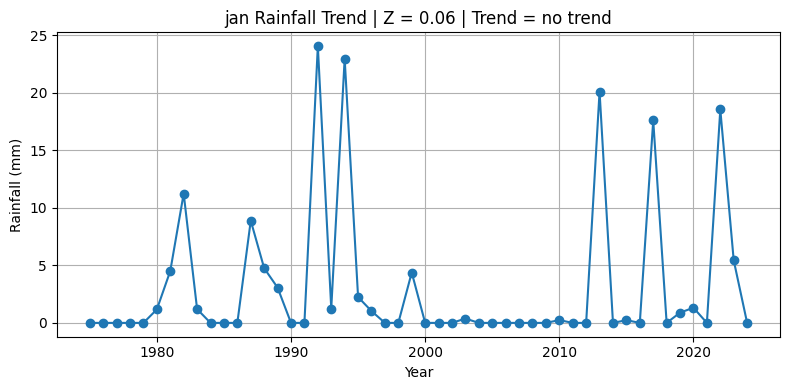

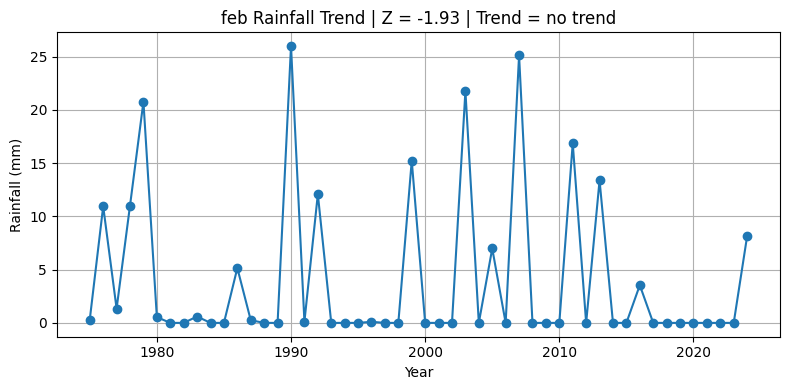

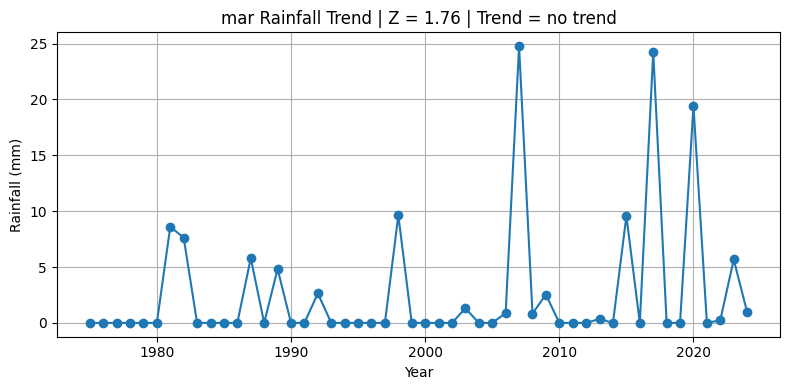

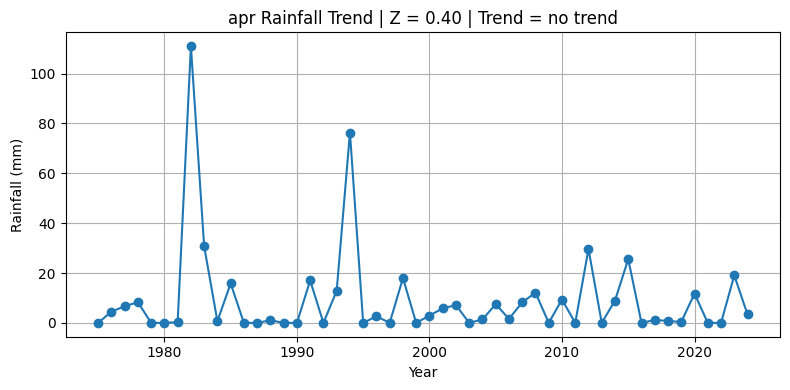

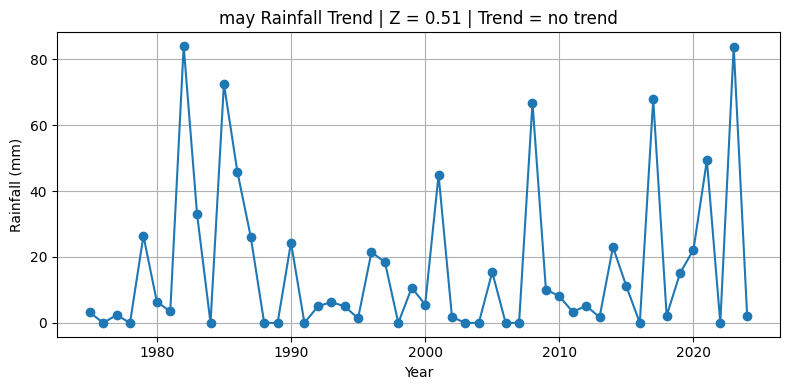

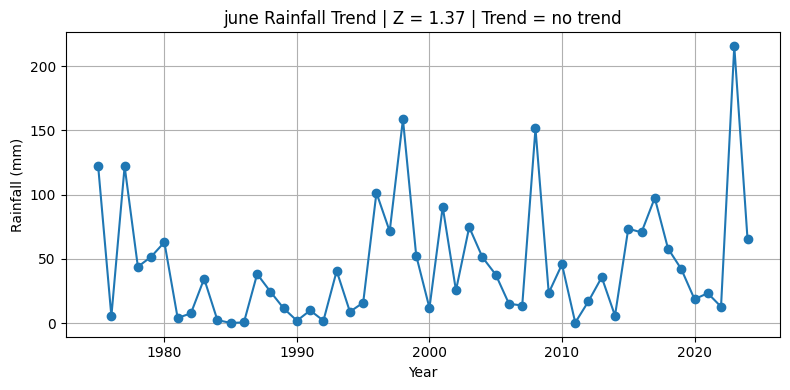

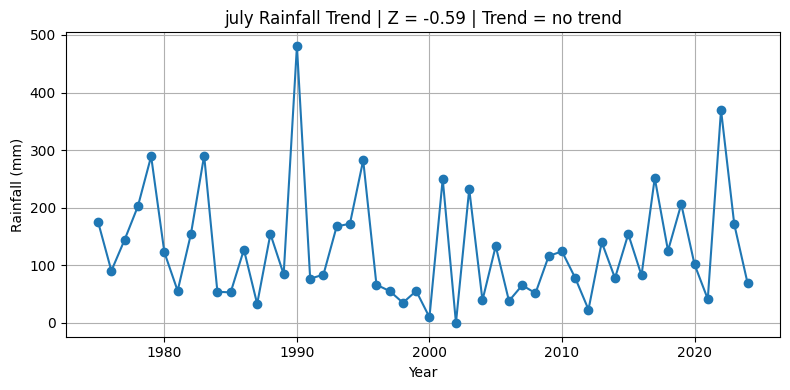

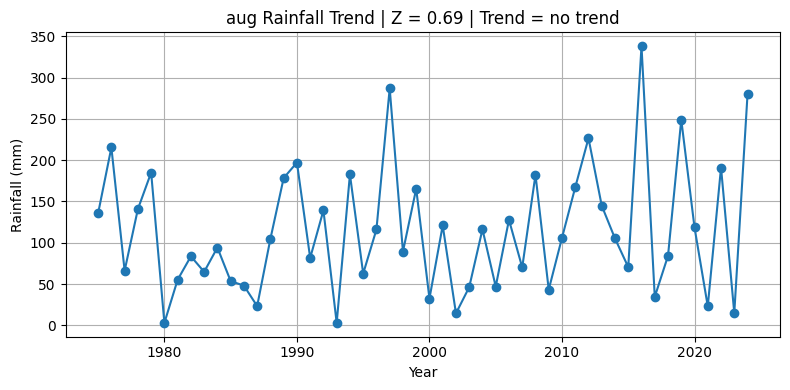

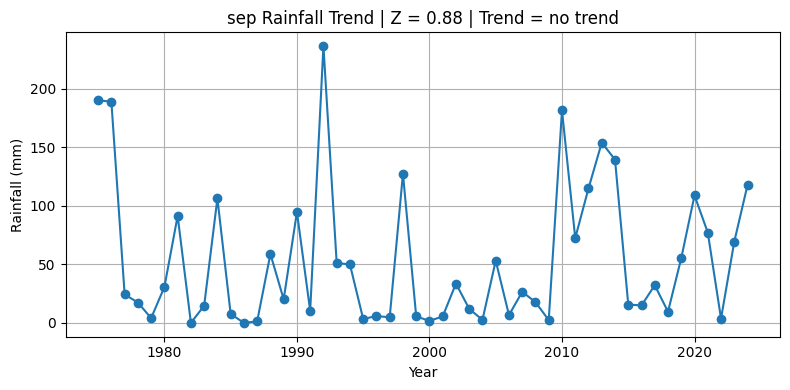

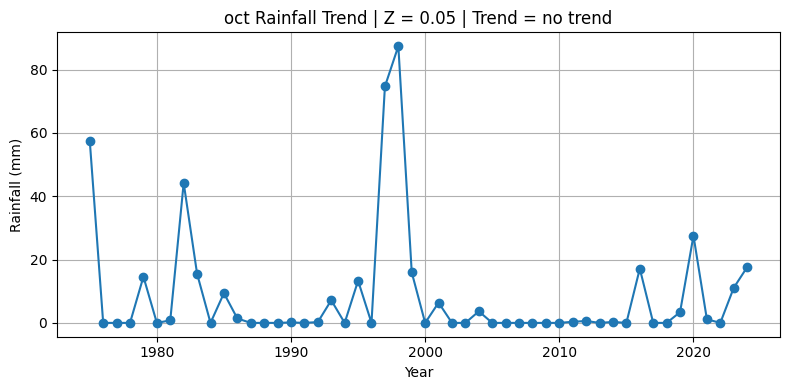

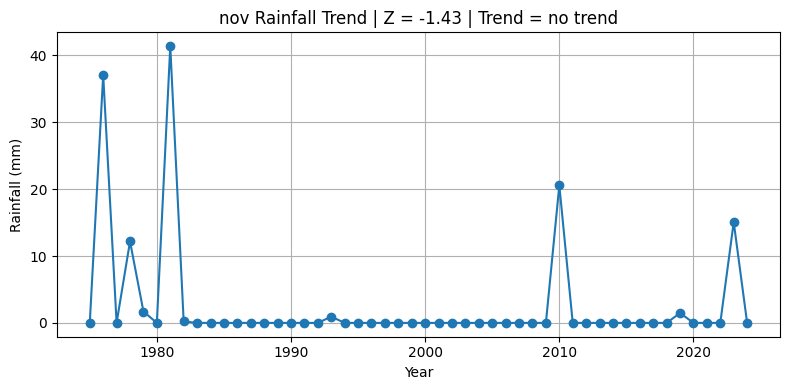

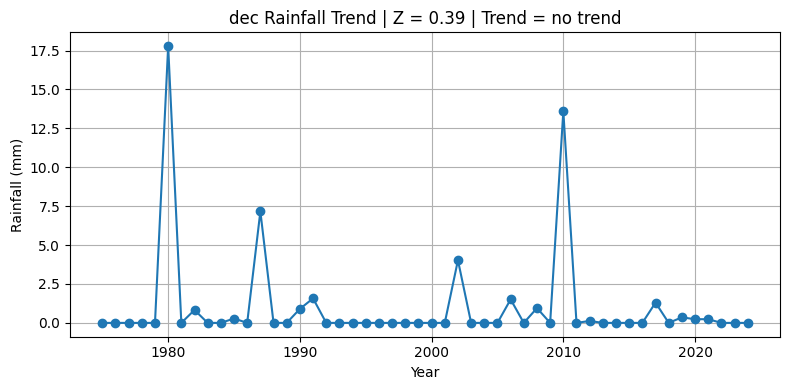

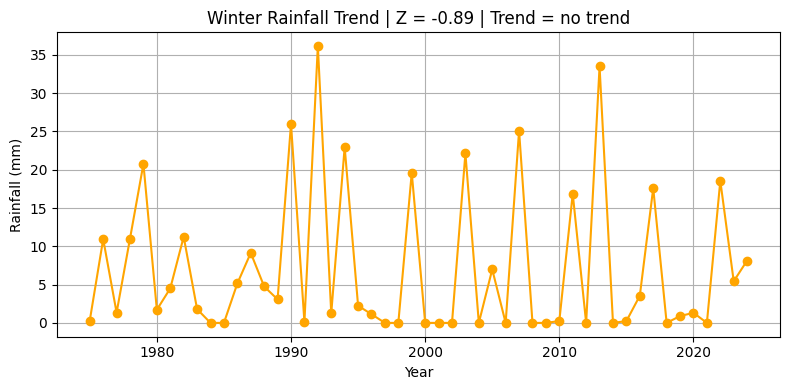

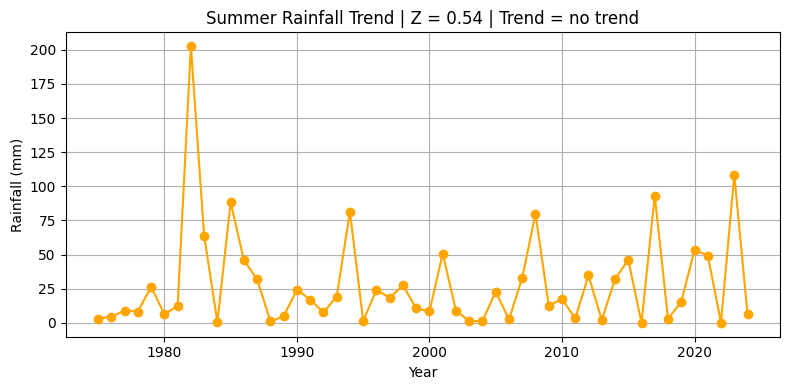

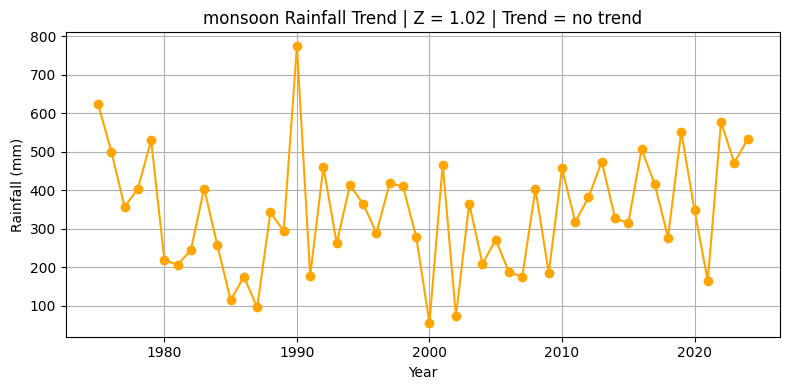

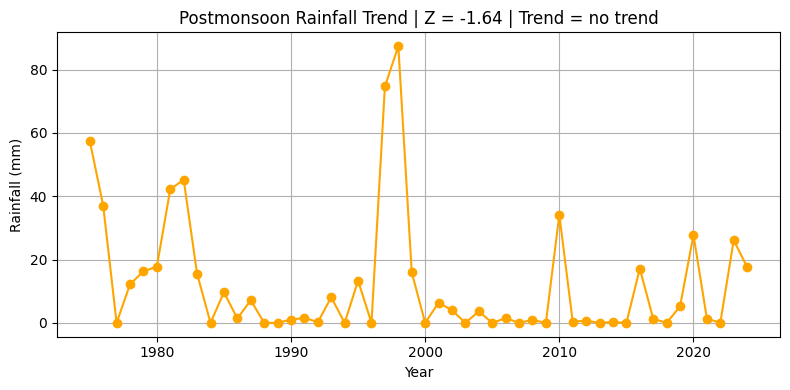

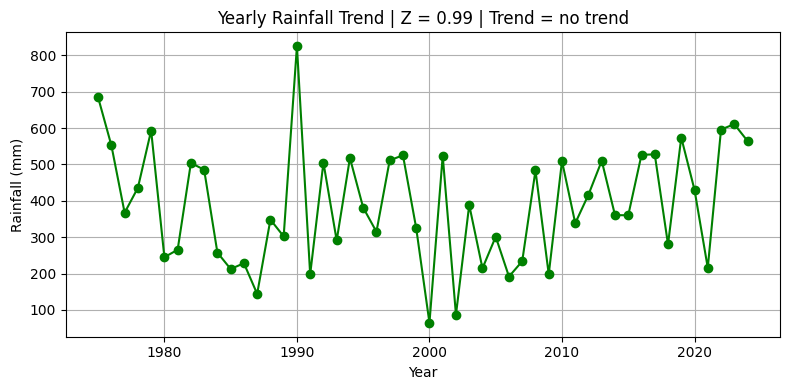


📊 Mann-Kendall Trend Summary for Jodhpur:
       Category   Z-value     Trend
0           jan  0.055400  no trend
1           feb -1.925178  no trend
2           mar  1.757541  no trend
3           apr  0.403101  no trend
4           may  0.506677  no trend
5          june  1.371837  no trend
6          july -0.585540  no trend
7           aug  0.685918  no trend
8           sep  0.878341  no trend
9           oct  0.053755  no trend
10          nov -1.428913  no trend
11          dec  0.393358  no trend
12       Winter -0.891133  no trend
13       Summer  0.535351  no trend
14      monsoon  1.020513  no trend
15  Postmonsoon -1.637987  no trend
16       yearly  0.987053  no trend


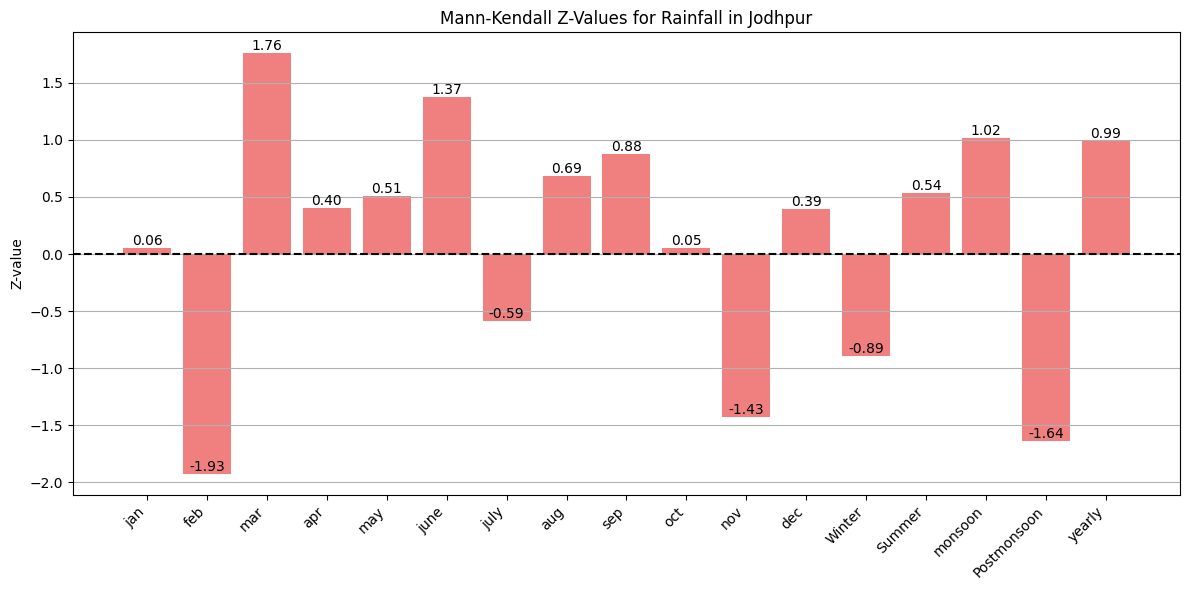

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import pymannkendall as mk

# Load the Jodhpur rainfall Excel file
file_path = '/content/Jodhpur_Data.xlsx'
df = pd.read_excel(file_path)

# Display column names to confirm structure
print(df.columns)

# --- Define column groups ---
months = df.columns[1:13]       # Jan to Dec
year_col = df.columns[0]        # Year
yearly_rain = df.columns[13]    # Yearly Rainfall
seasons = df.columns[14:18]     # Winter, Summer, Monsoon, PostMonsoon

# Dictionary to store results
z_values = {}
trend_types = {}

# --- Monthly Mann-Kendall Test ---
for col in months:
    result = mk.original_test(df[col].dropna())
    z_values[col] = result.z
    trend_types[col] = result.trend

    # Plot
    plt.figure(figsize=(8, 4))
    plt.plot(df[year_col], df[col], marker='o')
    plt.title(f"{col} Rainfall Trend | Z = {result.z:.2f} | Trend = {result.trend}")
    plt.xlabel("Year")
    plt.ylabel("Rainfall (mm)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Seasonal Mann-Kendall Test ---
for col in seasons:
    result = mk.original_test(df[col].dropna())
    z_values[col] = result.z
    trend_types[col] = result.trend

    plt.figure(figsize=(8, 4))
    plt.plot(df[year_col], df[col], marker='o', color='orange')
    plt.title(f"{col} Rainfall Trend | Z = {result.z:.2f} | Trend = {result.trend}")
    plt.xlabel("Year")
    plt.ylabel("Rainfall (mm)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Yearly Rainfall Mann-Kendall Test ---
result = mk.original_test(df[yearly_rain].dropna())
z_values[yearly_rain] = result.z
trend_types[yearly_rain] = result.trend

plt.figure(figsize=(8, 4))
plt.plot(df[year_col], df[yearly_rain], marker='o', color='green')
plt.title(f"Yearly Rainfall Trend | Z = {result.z:.2f} | Trend = {result.trend}")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Summary Table ---
summary = pd.DataFrame({
    'Category': list(z_values.keys()),
    'Z-value': list(z_values.values()),
    'Trend': list(trend_types.values())
})

print("\n📊 Mann-Kendall Trend Summary for Jodhpur:")
print(summary)

# --- Z-Value Comparison Chart ---
plt.figure(figsize=(12, 6))
bars = plt.bar(summary['Category'], summary['Z-value'], color='lightcoral')
plt.axhline(0, color='black', linestyle='--')
plt.title('Mann-Kendall Z-Values for Rainfall in Jodhpur')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Z-value')
plt.grid(True, axis='y')

# Add Z-value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Index(['Year', 'Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug',
       'Sept', 'Oct', 'Nov', 'Dec', 'yearly', 'Winter', 'Summer', 'monsoon',
       'Postmonsoon'],
      dtype='object')


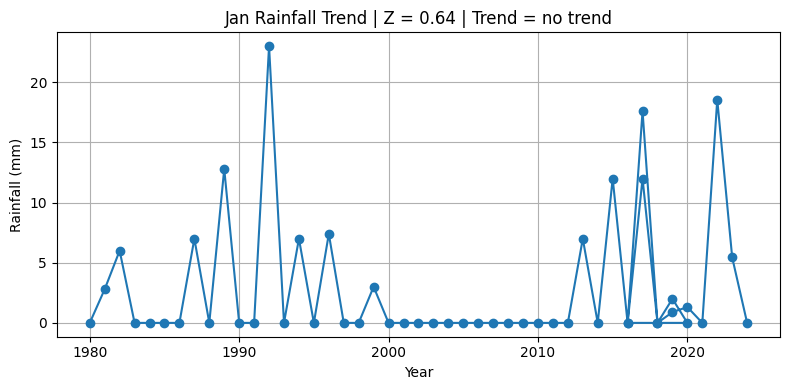

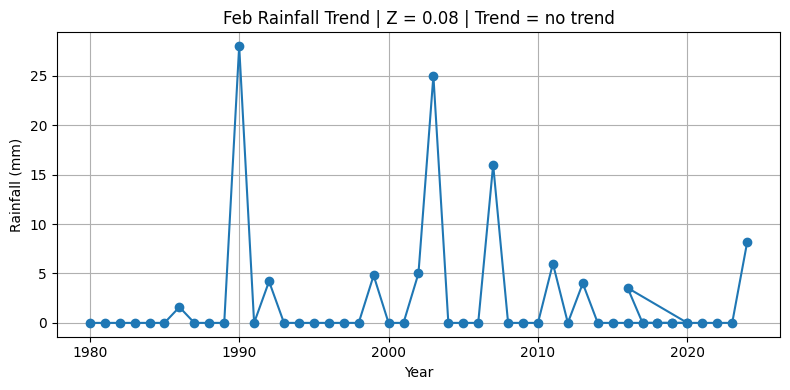

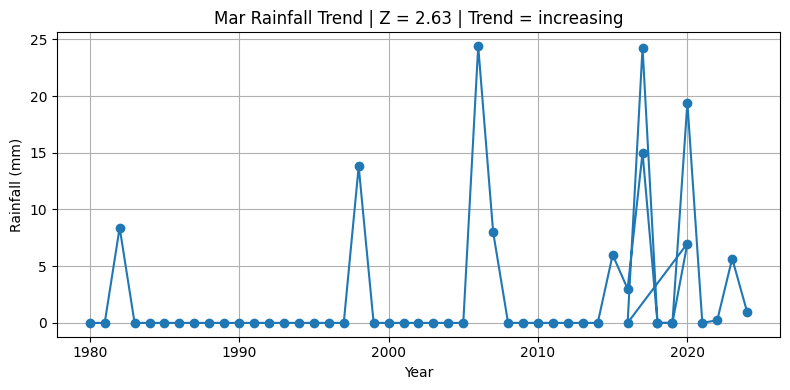

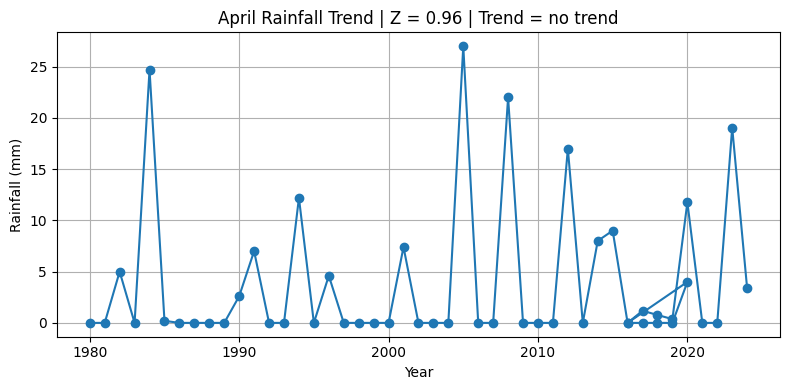

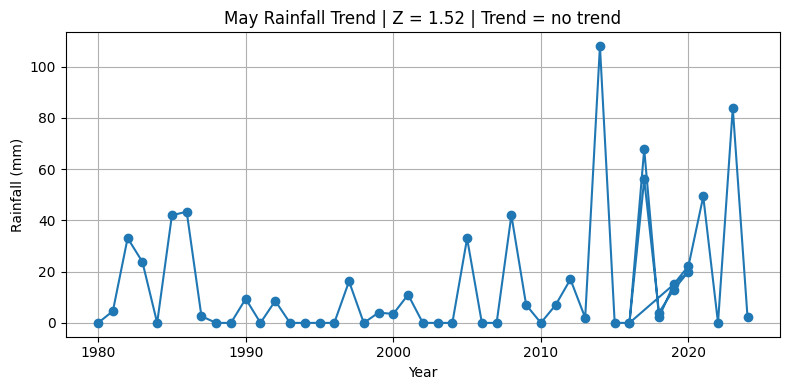

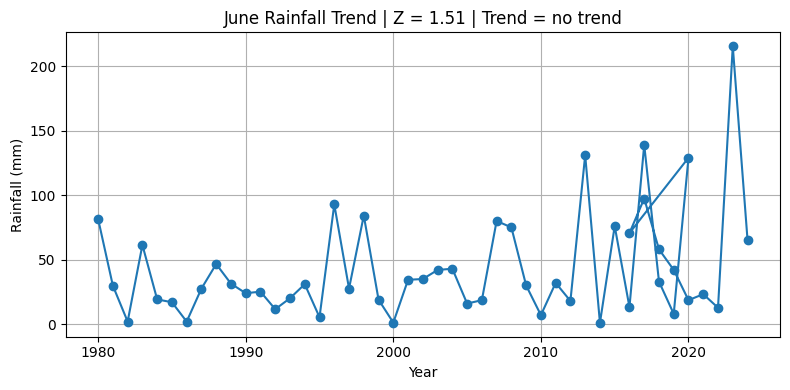

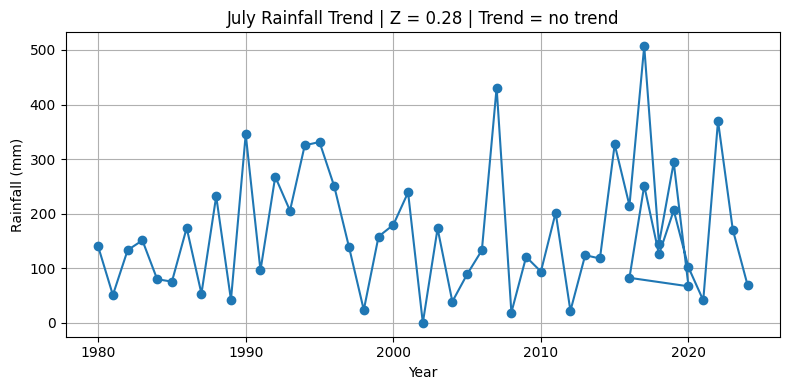

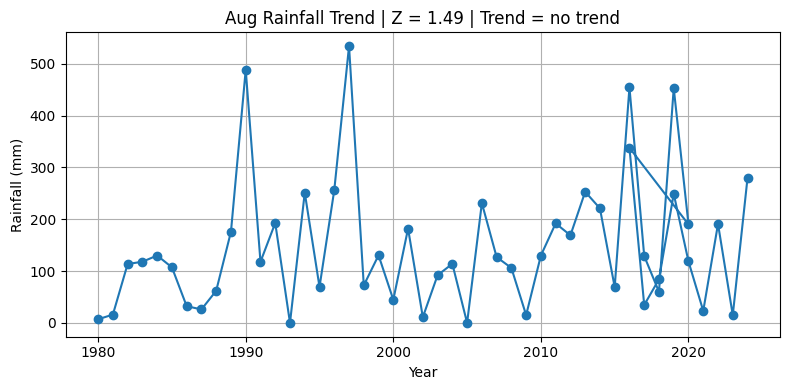

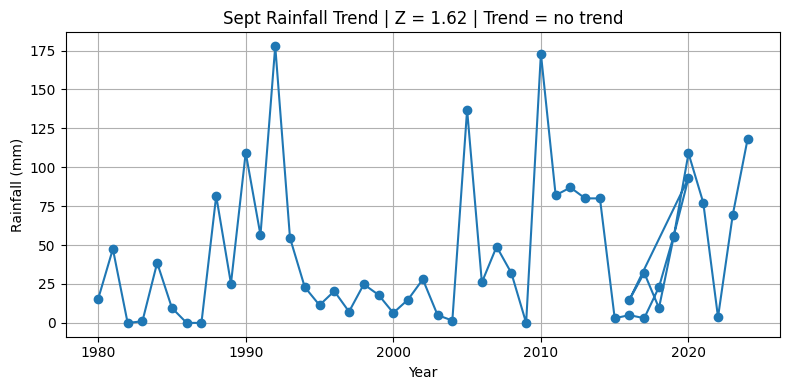

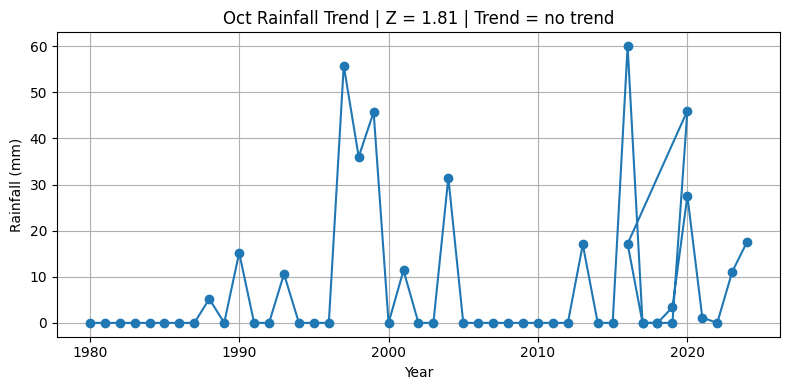

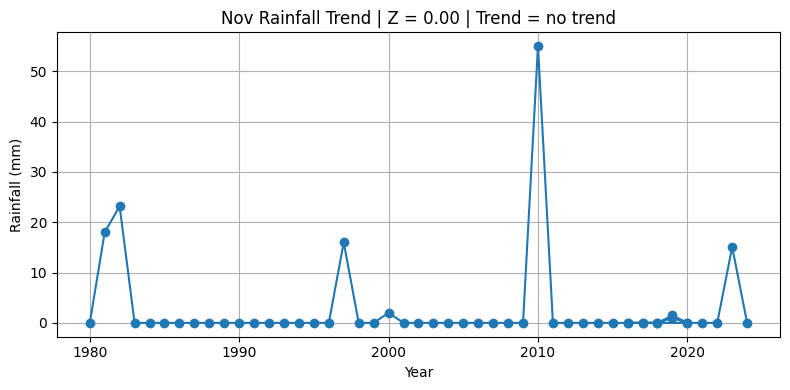

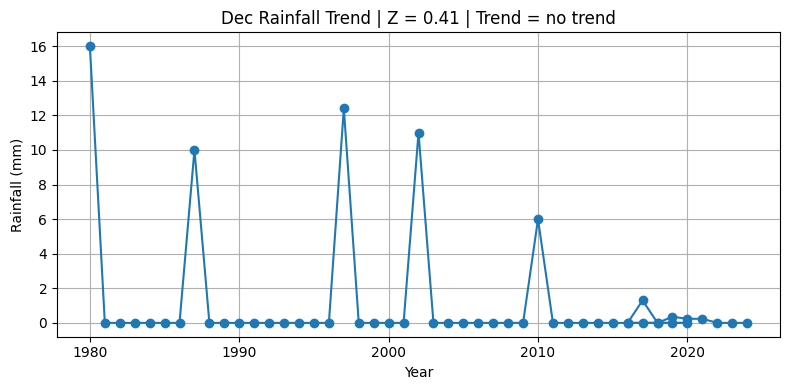

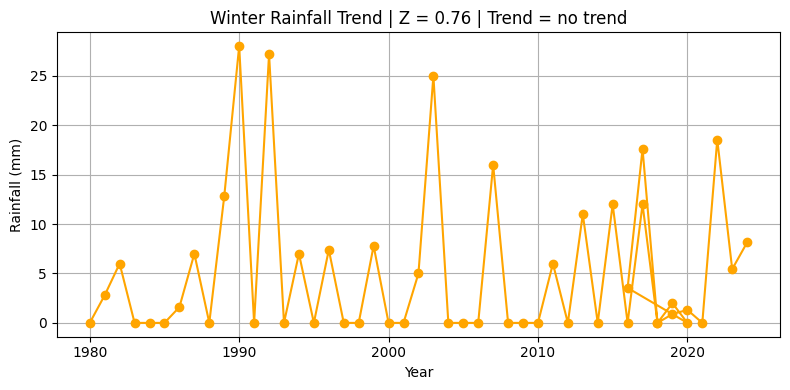

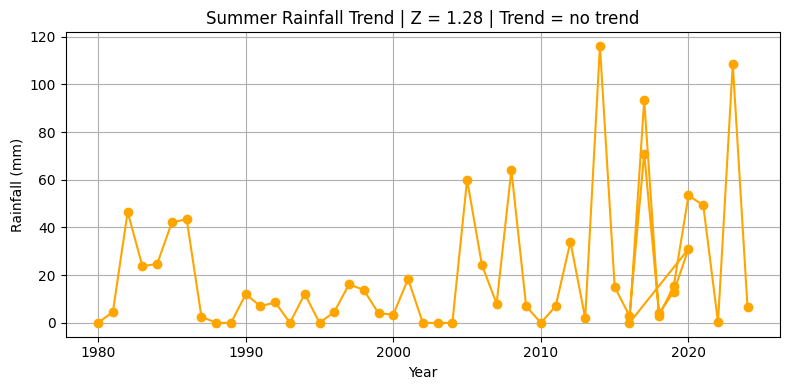

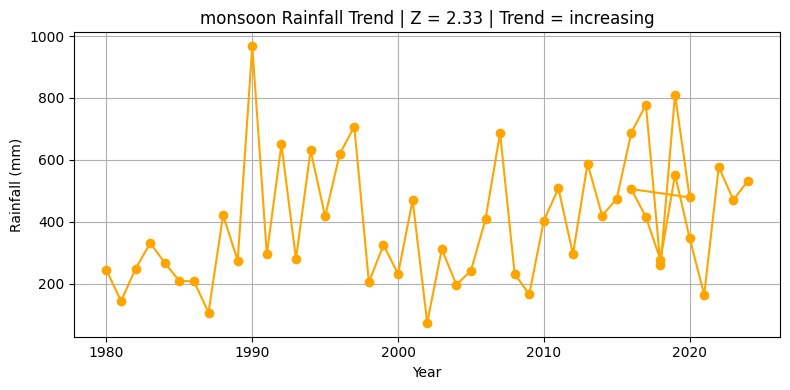

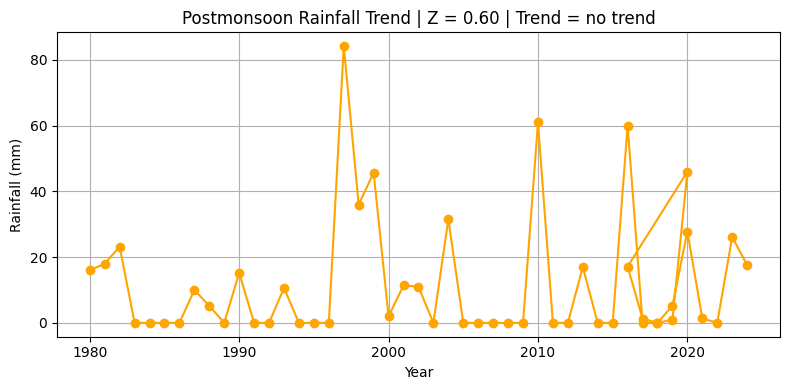

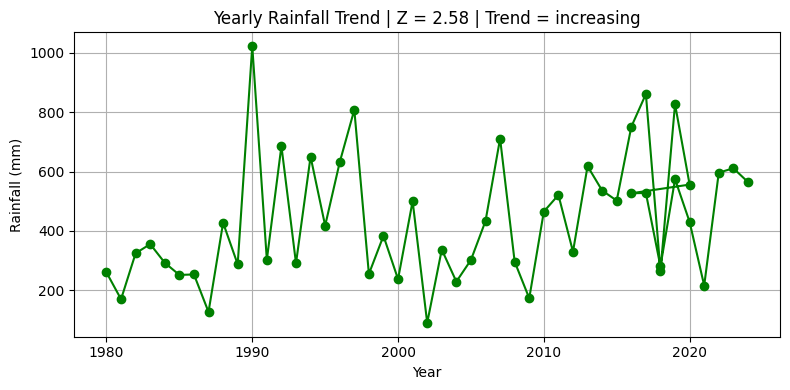


📊 Mann-Kendall Trend Summary for Pali:
       Category   Z-value       Trend
0           Jan  0.636142    no trend
1           Feb  0.081056    no trend
2           Mar  2.633288  increasing
3         April  0.956498    no trend
4           May  1.515241    no trend
5          June  1.505780    no trend
6          July  0.284405    no trend
7           Aug  1.489049    no trend
8          Sept  1.623502    no trend
9           Oct  1.808611    no trend
10          Nov  0.000000    no trend
11          Dec  0.413665    no trend
12       Winter  0.761625    no trend
13       Summer  1.277311    no trend
14      monsoon  2.325430  increasing
15  Postmonsoon  0.604204    no trend
16       yearly  2.576376  increasing


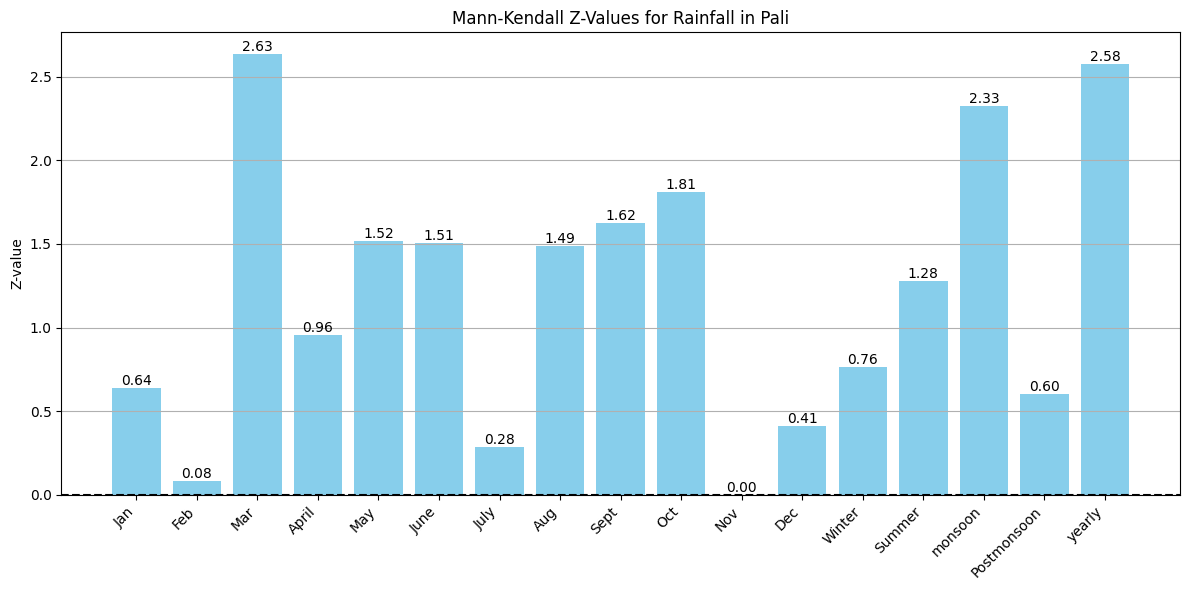

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import pymannkendall as mk

# Load the Pali rainfall Excel file
file_path = '/content/Pali_Data.xlsx'
df = pd.read_excel(file_path)

# Display column names to confirm structure
print(df.columns)

# --- Define column groups ---
months = df.columns[1:13]       # Jan to Dec
year_col = df.columns[0]        # Year
yearly_rain = df.columns[13]    # Yearly Rainfall
seasons = df.columns[14:18]     # Winter, Summer, Monsoon, PostMonsoon

# Dictionary to store results
z_values = {}
trend_types = {}

# --- Monthly Mann-Kendall Test ---
for col in months:
    result = mk.original_test(df[col].dropna())
    z_values[col] = result.z
    trend_types[col] = result.trend

    # Plot
    plt.figure(figsize=(8, 4))
    plt.plot(df[year_col], df[col], marker='o')
    plt.title(f"{col} Rainfall Trend | Z = {result.z:.2f} | Trend = {result.trend}")
    plt.xlabel("Year")
    plt.ylabel("Rainfall (mm)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Seasonal Mann-Kendall Test ---
for col in seasons:
    result = mk.original_test(df[col].dropna())
    z_values[col] = result.z
    trend_types[col] = result.trend

    plt.figure(figsize=(8, 4))
    plt.plot(df[year_col], df[col], marker='o', color='orange')
    plt.title(f"{col} Rainfall Trend | Z = {result.z:.2f} | Trend = {result.trend}")
    plt.xlabel("Year")
    plt.ylabel("Rainfall (mm)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Yearly Rainfall Mann-Kendall Test ---
result = mk.original_test(df[yearly_rain].dropna())
z_values[yearly_rain] = result.z
trend_types[yearly_rain] = result.trend

plt.figure(figsize=(8, 4))
plt.plot(df[year_col], df[yearly_rain], marker='o', color='green')
plt.title(f"Yearly Rainfall Trend | Z = {result.z:.2f} | Trend = {result.trend}")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Summary Table ---
summary = pd.DataFrame({
    'Category': list(z_values.keys()),
    'Z-value': list(z_values.values()),
    'Trend': list(trend_types.values())
})

print("\n📊 Mann-Kendall Trend Summary for Pali:")
print(summary)

# --- Z-Value Comparison Chart ---
plt.figure(figsize=(12, 6))
bars = plt.bar(summary['Category'], summary['Z-value'], color='skyblue')
plt.axhline(0, color='black', linestyle='--')
plt.title('Mann-Kendall Z-Values for Rainfall in Pali')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Z-value')
plt.grid(True, axis='y')

# Add Z-value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
import pymannkendall as mk
import matplotlib.pyplot as plt

# === File path and read ===
file_path = '/content/Pali_Data.xlsx'  # Change this path for other districts
output_file = '/content/Pali_Trend_Summary.xlsx'  # Excel summary output
df = pd.read_excel(file_path)

# === Column setup ===
year_col = df.columns[0]             # Year
months = df.columns[1:13]            # Jan to Dec
yearly_col = df.columns[13]          # Yearly
seasons = df.columns[14:18]          # Winter, Summer, Monsoon, PostMonsoon

# === Store results ===
results = []

# --- Monthly ---
for col in months:
    result = mk.original_test(df[col].dropna())
    results.append({
        'Category': col,
        'Z-value': result.z,
        'Trend': result.trend,
        'p-value': result.p,
        'Tau': result.Tau
    })

# --- Seasonal ---
for col in seasons:
    result = mk.original_test(df[col].dropna())
    results.append({
        'Category': col,
        'Z-value': result.z,
        'Trend': result.trend,
        'p-value': result.p,
        'Tau': result.Tau
    })

# --- Yearly ---
result = mk.original_test(df[yearly_col].dropna())
results.append({
    'Category': yearly_col,
    'Z-value': result.z,
    'Trend': result.trend,
    'p-value': result.p,
    'Tau': result.Tau
})

# === Create dataframe for output ===
summary_df = pd.DataFrame(results)

# === Save to Excel ===
summary_df.to_excel(output_file, index=False)

print(f"✅ Trend summary saved to Excel at: {output_file}")
summary_df.head()


✅ Trend summary saved to Excel at: /content/Pali_Trend_Summary.xlsx


Category   Z-value       Trend   p-value       Tau
0      Jan  0.636142    no trend  0.524684  0.053061
1      Feb  0.081056    no trend  0.935397  0.006531
2      Mar  2.633288  increasing  0.008456  0.198367
3    April  0.956498    no trend  0.338821  0.083265
4      May  1.515241    no trend  0.129711  0.143673

In [13]:
import pandas as pd
import pymannkendall as mk
import os

# === List of your Excel files and their district names ===
files = {
    'Sirohi': '/content/Sirohi_Data.xlsx',
    'Jaisalmer': '/content/jaiselmer_Data.xlsx',
    'Barmer': '/content/BarmerData.xlsx',
    'Jodhpur': '/content/Jodhpur_Data.xlsx',
    'Pali': '/content/Pali_Data.xlsx'
}

# === Output folder ===
output_dir = '/content/trend_outputs/'
os.makedirs(output_dir, exist_ok=True)

# === Function to calculate Mann-Kendall and write summary ===
def analyze_and_save(file_path, district_name):
    df = pd.read_excel(file_path)

    year_col = df.columns[0]              # Year column
    months = df.columns[1:13]             # Jan to Dec
    yearly_col = df.columns[13]           # Yearly rainfall
    seasons = df.columns[14:18]           # Winter, Summer, Monsoon, PostMonsoon

    results = []

    # Monthly trends
    for col in months:
        result = mk.original_test(df[col].dropna())
        results.append({
            'Category': col,
            'Z-value': result.z,
            'Trend': result.trend,
            'p-value': result.p,
            'Tau': result.Tau
        })

    # Seasonal trends
    for col in seasons:
        result = mk.original_test(df[col].dropna())
        results.append({
            'Category': col,
            'Z-value': result.z,
            'Trend': result.trend,
            'p-value': result.p,
            'Tau': result.Tau
        })

    # Yearly trend
    result = mk.original_test(df[yearly_col].dropna())
    results.append({
        'Category': yearly_col,
        'Z-value': result.z,
        'Trend': result.trend,
        'p-value': result.p,
        'Tau': result.Tau
    })

    # Save to Excel
    summary_df = pd.DataFrame(results)
    output_file = os.path.join(output_dir, f'{district_name}_Trend_Summary.xlsx')
    summary_df.to_excel(output_file, index=False)
    print(f"✅ Saved trend summary for {district_name} at: {output_file}")

# === Run for each file ===
for district, path in files.items():
    analyze_and_save(path, district)


✅ Saved trend summary for Sirohi at: /content/trend_outputs/Sirohi_Trend_Summary.xlsx
✅ Saved trend summary for Jaisalmer at: /content/trend_outputs/Jaisalmer_Trend_Summary.xlsx


ValueError: could not convert string to float: '—'

In [14]:
def analyze_and_save(file_path, district_name):
    df = pd.read_excel(file_path)

    # Clean data: Replace non-numeric values
    df.replace(['—', '–', '-', 'NA', 'na', 'NaN', 'nan', ''], pd.NA, inplace=True)

    # Convert all columns except 'Year' to numeric
    for col in df.columns[1:]:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    year_col = df.columns[0]
    months = df.columns[1:13]
    yearly_col = df.columns[13]
    seasons = df.columns[14:18]

    results = []

    # Monthly trends
    for col in months:
        result = mk.original_test(df[col].dropna())
        results.append({
            'Category': col,
            'Z-value': result.z,
            'Trend': result.trend,
            'p-value': result.p,
            'Tau': result.Tau
        })

    # Seasonal trends
    for col in seasons:
        result = mk.original_test(df[col].dropna())
        results.append({
            'Category': col,
            'Z-value': result.z,
            'Trend': result.trend,
            'p-value': result.p,
            'Tau': result.Tau
        })

    # Yearly trend
    result = mk.original_test(df[yearly_col].dropna())
    results.append({
        'Category': yearly_col,
        'Z-value': result.z,
        'Trend': result.trend,
        'p-value': result.p,
        'Tau': result.Tau
    })

    # Save to Excel
    summary_df = pd.DataFrame(results)
    output_file = os.path.join(output_dir, f'{district_name}_Trend_Summary.xlsx')
    summary_df.to_excel(output_file, index=False)
    print(f"✅ Saved trend summary for {district_name} at: {output_file}")


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# List of all districts
districts = ["Sirohi", "Jaisalmer", "Barmer", "Jodhpur", "Pali", "Jodhpur_Division"]
input_dir = "/content/trend_outputs"

# Read all district files
trend_data = {}

for district in districts:
    path = os.path.join(input_dir, f"{district}_Trend_Summary.xlsx")
    df = pd.read_excel(path)
    df = df[['Category', 'Z-value']]  # Only need these for plotting
    df.columns = ['Category', district]  # Rename column for merging
    trend_data[district] = df

# Merge all dataframes on 'Category'
from functools import reduce
dfs = list(trend_data.values())
merged_df = reduce(lambda left, right: pd.merge(left, right, on='Category'), dfs)

# Split into monthly, seasonal, and yearly data
monthly = merged_df[merged_df['Category'].isin(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])]
seasonal = merged_df[merged_df['Category'].isin(['Winter', 'Summer', 'Monsoon', 'PostMonsoon'])]
yearly = merged_df[merged_df['Category'].str.contains("Year", case=False)]

# Function to plot comparison
def plot_comparison(df, title, figsize=(14, 6)):
    df_melt = pd.melt(df, id_vars='Category', var_name='District', value_name='Z-value')
    plt.figure(figsize=figsize)
    sns.barplot(data=df_melt, x='Category', y='Z-value', hue='District')
    plt.title(f'{title} - Mann-Kendall Z-values Comparison', fontsize=14)
    plt.xticks(rotation=45)
    plt.axhline(0, color='black', linestyle='--')
    plt.tight_layout()
    plt.show()

# Plot comparisons
plot_comparison(monthly, 'Monthly Rainfall')
plot_comparison(seasonal, 'Seasonal Rainfall')
plot_comparison(yearly, 'Yearly Rainfall')


FileNotFoundError: [Errno 2] No such file or directory: '/content/trend_outputs/Barmer_Trend_Summary.xlsx'

In [16]:
import os

trend_files = os.listdir("/content/trend_outputs")
for file in trend_files:
    print(file)


Jaisalmer_Trend_Summary.xlsx
Sirohi_Trend_Summary.xlsx


In [17]:
districts = ["Sirohi", "Jaisalmer", "Barmer", "Jodhpur", "Pali", "Jodhpur_Division"]


In [18]:
files = {
    "Sirohi": "Sirohi_Trend_Summary.xlsx",
    "Jaisalmer": "Jaisalmer_Trend_Summary.xlsx",
    "Barmer": "BarmerData_Trend_Summary.xlsx",  # updated
    "Jodhpur": "Jodhpur_Trend_Summary.xlsx",
    "Pali": "Pali_Trend_Summary.xlsx",
    "Jodhpur_Division": "Jodhpur_Division_Trend_Summary.xlsx"
}


In [20]:
import os

output_dir = "/content/trend_outputs"
available_files = os.listdir(output_dir)

print("Available files:")
for f in available_files:
    print(f)


Available files:
Jaisalmer_Trend_Summary.xlsx
Sirohi_Trend_Summary.xlsx


In [21]:
files = {
    "Sirohi": "Sirohi_Trend_Summary.xlsx",
    "Jaisalmer": "Jaisalmer_Trend_Summary.xlsx",
    "Barmer": "Barmer_Trend_Summary.xlsx",  # make sure this matches the actual file
    "Jodhpur": "Jodhpur_Trend_Summary.xlsx",
    "Pali": "Pali_Trend_Summary.xlsx"
}


In [23]:
import pandas as pd
import os
import matplotlib.pyplot as plt

input_dir = "/content/trend_outputs"

combined = None

for district, filename in files.items():
    path = os.path.join(input_dir, filename)
    df = pd.read_excel(path)
    df = df[['Category', 'Z-value']]  # keep only relevant columns
    df.columns = ['Category', district]  # rename Z-value column to district name

    if combined is None:
        combined = df
    else:
        combined = pd.merge(combined, df, on='Category', how='outer')

# Plot
combined.set_index('Category').T.plot(kind='bar', figsize=(15, 6), colormap='viridis')
plt.title("Mann-Kendall Z-values Comparison across Districts")
plt.xlabel("District")
plt.ylabel("Z-value")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/trend_outputs/Barmer_Trend_Summary.xlsx'

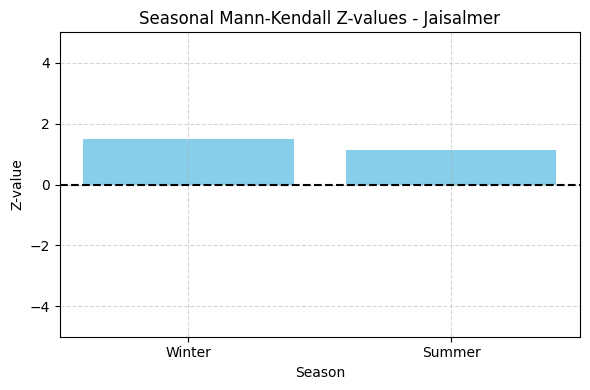

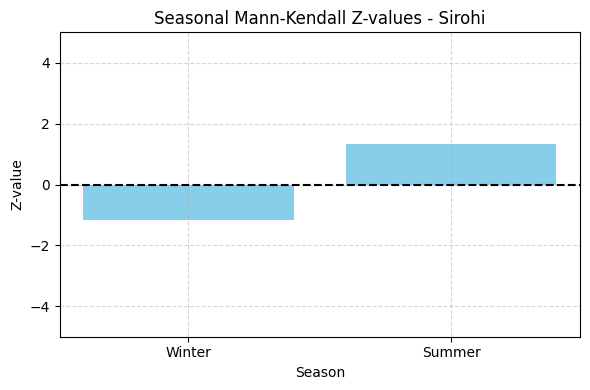

In [24]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Set directory path
input_dir = "/content/trend_outputs"

# Get list of all Excel files
all_files = [f for f in os.listdir(input_dir) if f.endswith(".xlsx")]

# Define valid seasonal categories
seasonal_categories = ['Winter', 'Summer', 'Monsoon', 'Post-Monsoon']

# Loop through each file
for file in all_files:
    district_name = file.replace("_Trend_Summary.xlsx", "")
    file_path = os.path.join(input_dir, file)

    # Read data
    df = pd.read_excel(file_path)

    # Filter only seasonal rows
    seasonal_data = df[df['Category'].isin(seasonal_categories)]

    # Plot
    plt.figure(figsize=(6, 4))
    plt.bar(seasonal_data['Category'], seasonal_data['Z-value'], color='skyblue')
    plt.title(f"Seasonal Mann-Kendall Z-values - {district_name}")
    plt.xlabel("Season")
    plt.ylabel("Z-value")
    plt.ylim(-5, 5)
    plt.axhline(y=0, color='black', linestyle='--')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


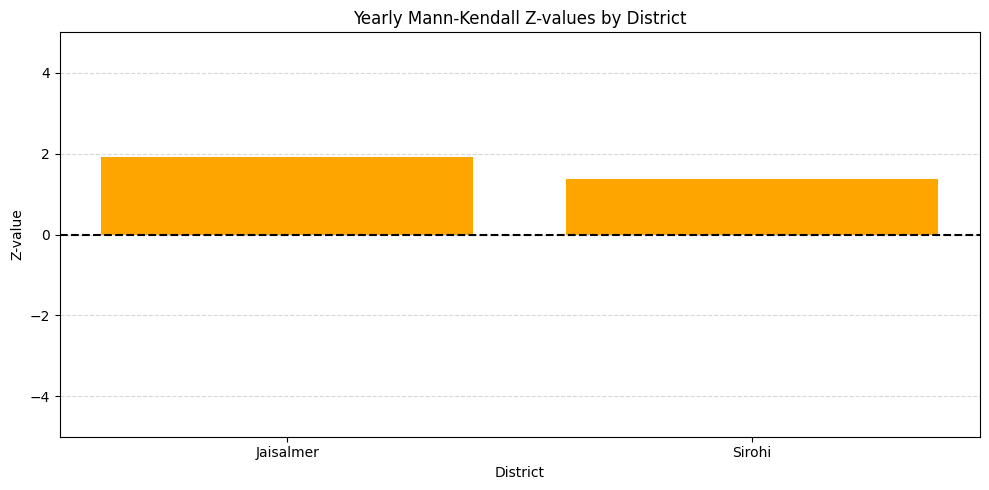

In [25]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Set the directory containing the trend summary Excel files
input_dir = "/content/trend_outputs"

# Collect yearly Z-values from each district
yearly_trends = {}

# Loop through files in the directory
for file in os.listdir(input_dir):
    if file.endswith("_Trend_Summary.xlsx"):
        district = file.replace("_Trend_Summary.xlsx", "")
        file_path = os.path.join(input_dir, file)

        df = pd.read_excel(file_path)

        # Extract the 'Yearly' row
        yearly_row = df[df['Category'].str.lower() == 'yearly']
        if not yearly_row.empty:
            z_value = yearly_row['Z-value'].values[0]
            yearly_trends[district] = z_value

# Create the plot
plt.figure(figsize=(10, 5))
plt.bar(yearly_trends.keys(), yearly_trends.values(), color='orange')
plt.title("Yearly Mann-Kendall Z-values by District")
plt.xlabel("District")
plt.ylabel("Z-value")
plt.axhline(y=0, color='black', linestyle='--')
plt.ylim(-5, 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [26]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Folder where Excel trend files are stored
input_dir = "/content/trend_outputs"
# Folder where you want to save the plots
output_dir = "/content/trend_plots"

# Create output folder if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Dictionary to store yearly Z-values
yearly_trends = {}

# Read all district trend files
for file in os.listdir(input_dir):
    if file.endswith("_Trend_Summary.xlsx"):
        district = file.replace("_Trend_Summary.xlsx", "")
        file_path = os.path.join(input_dir, file)

        df = pd.read_excel(file_path)

        # Filter the 'Yearly' category
        yearly_row = df[df['Category'].str.lower() == 'yearly']
        if not yearly_row.empty:
            z_value = yearly_row['Z-value'].values[0]
            yearly_trends[district] = z_value

# Create the yearly bar plot
plt.figure(figsize=(10, 5))
plt.bar(yearly_trends.keys(), yearly_trends.values(), color='teal')
plt.title("Yearly Mann-Kendall Z-values by District")
plt.xlabel("District")
plt.ylabel("Z-value")
plt.axhline(y=0, color='black', linestyle='--')
plt.ylim(-5, 5)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Save the plot
plot_path = os.path.join(output_dir, "Yearly_Z_Trend.png")
plt.savefig(plot_path, dpi=300)
plt.close()

print(f"✅ Saved yearly Z-value trend plot at: {plot_path}")


✅ Saved yearly Z-value trend plot at: /content/trend_plots/Yearly_Z_Trend.png
